# COGS 108 - Movie Popularity and Revenue Analysis

# Overview

This project determines if the amount of Google searches of a movie is related to the amount of money it makes. We gathered data from Google and BoxOfficeMojo, containing 206 and 1000 observations respectively. After cleaning our data, we utilized data visualizations, linear prediction, and multivariate regression to conduct our analysis. From this analysis, we discovered a significant positive trend between movie popularity as our predictor variable and movie revenue as our outcome variable. 

# Names

- Megan Tan
- Nhu Luong
- Ethan Zhou
- David Nguyen
- Jennifer Yang


<a id='research_question'></a>
# Research Question

Is there a relationship between the search popularity (in terms of Google searches) a movie receives before its release and the box-office revenue it makes during its opening weekend?

<a id='background'></a>

# Background & Prior Work

According to Forbes article about how marketing helps box office sales, movie marketers find it difficult to connect specific marketing activities to actual ticket sales because there may be many factors that have influenced a ticket buyer [1]. However, we intend to use the number of Google searches for a movie as a measure of marketing effectiveness. Our beliefs are that a movie’s popularity prior to its opening weekend is a positive indication of the success of its gross opening sales. 

From our research, we found that television is the most effective method of advertising [2]. Consumers could search up the movie title after viewing the trailer on TV, which could lead to marketing-driven Google searches. While television ranks as one of the more popular vessels of marketing, the Forbes article states that for the typical PG-13 action film during the data’s time, shifting 10% of ad budgets from TV to online video could have increased marketing-driven sales by 16% [1]. Searching up movie trailers in Google could also contribute to a spike in trailer views, leading to increased box office revenue. More recently, major 2017-19 film trailer views on well-known YouTube trailer accounts were counted until the Saturday before the release and were indicative of their high opening weekend box-office revenues. In the data analysis performed on 421 films, including Avengers: Endgame and Avengers: Infinity War, there appeared to be an “upward trend, meaning a positive relationship between YouTube hits and opening weekend ticket sales” [3]. 

References (include links):
- 1) 8 Insights On How Marketing Drives Movie Box Office Sales https://www.forbes.com/sites/forbesinsights/2015/07/01/8-insights-on-how-marketing-drives-movie-box-office-sales/?sh=698151618ce3 
- 2) To Drive Ticket Sales for Action Films, How Should Studios Allocate Their Marketing? https://www.home.neustar/clients/google 
- 3) Can YouTube Trailer Views Predict Box Office Openings? https://www.hollywoodreporter.com/news/how-predictive-are-youtube-trailer-views-box-office-openings-1251422 

# Hypothesis


**We predict that there is a positive relationship between Google searches a movie receives and the box-office revenue the movie makes on opening weekend. This means an increase in Google searches corresponds to an increase in revenue a movie makes.**

The justification for this hypothesis is that we believe that the more Google searches a movie receives before release, the higher amount of people know about its existence. Therefore, since more people know this movie is coming out, more people will go and see the movie on opening weekend. In a sense, we believe that the number of Google searches a movie gets before it is released is almost equivalent to how well the movie was marketed to consumers. So, logically, the better marketed a movie is, the more money it will make on opening weekend.

# Dataset(s)

- Dataset Name: Top Opening Weekends
- Source for the dataset: https://www.boxofficemojo.com/chart/top_opening_weekend/
- Link to the dataset: https://github.com/COGS108/group004_wi21/blob/main/data/opening_weekend.csv
- Number of observations: 1000

This dataset includes all of the opening weekend dates and the box office revenues for the top 1000 movies in the United States from January 1st, 1997 to September 3rd, 2020. The movies are ranked from highest to lowest in terms of their box office revenues on opening weekend. It also contains data about each movie's opening weekend revenue, total gross earning, number of theater it was shown in, release date and distributor.

- Dataset Name: movie_interest.csv
- Source for the dataset: Pulled from Google trends using pytrends
- Link to the dataset: https://github.com/COGS108/group004_wi21/blob/main/data/movie_interest.csv 
- Number of observations: 207

This dataset describes the search popularity on Google in the United States for the top 1000 movies based on the top opening weekend revenues in the Top Opening Weekends dataset (sans the duplicate movies), and it lists the movies’ relative search popularity for every month from January 1st, 2004 to February 1st, 2021. Search popularity observations are a score from 0 to 100, relative to the highest search popularity, calculated on a monthly basis on Google searches in the United States.

# Setup

## You may need to restart the kernel after running the following setup

In [197]:
!pip3 install pytrends
!pip3 install dateparser
!pip3 install BeautifulSoup4 as bs4

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [102]:
import requests
from bs4 import BeautifulSoup
import dateparser
import pandas as pd
from pytrends.request import TrendReq

from datetime import datetime, timedelta
import time

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import patsy
import statsmodels.api as sm

# Data Analysis

## Data Cleaning:

After importing all the packages necessary to complete our data cleaning, we converted the dollar value given in the opening weekend revenue and the total gross revenue variables from a string to an integer. Next, we initialized a dataframe to hold the opening weekend dataset and renamed/shortened some of the variable names (e.g. “Release” to “Name” of the movie, “Total Gross” to “Total”). We filled the dataframe with data from the Box Office Mojo dataset and stored the table values from the page and stored them into rows. We then extracted relevant information from each row by filling columns with information such as rank, opening, total, open_percent, average, date, and distributor. In a for loop, strings were converted to integers and floats by removing commas and percentages in the ‘opening,’ ‘total,’ and ‘open_percent’ columns, and the dates were converted to datetime formatted dates by using dateparser. We also reset the index to the names of the movies instead of the rank. After scraping this dataset, we saved all the information in the opening_weekend.csv.

We then used the opening weekend dataframe and pytrend to automate and download reports from Google Trends to get information about the interest of each movie over time. Next, we checked if there were any duplicate movie names and dropped the duplicates from the search popularity dataframe (movie_interest.csv). Additionally, we dropped the movies that were released before January 1st, 2004 from the opening weekend dataframe, since Google Trends doesn’t cover that timeframe, and the resulting data frame included 766 movies. 

When sorting the data into movie_interest.csv, we iterated over all the movies in subsets of [4 different movies, Avengers: Endgame] at a time as build_payload() only permits a maximum of 5 keywords at once. We then used pytrends.build_payload to look for the number of searches for each movie in the subset over the entire data frame. We used temp_df to create a temporary dataframe for those subsets, where each column is a data frame and each row is a list of dates. Each [row, col] value is the relative interest in comparison to the movie, Avengers: Endgame, because it was the top box office movie that we wanted to make the comparisons to. After, we concatenated temp_df to movie_interest_df so that the latter could contain all the subsets and we saved the movie_interest_df to a .csv file.

In [4]:
# Converts dollar value given in string to integer
def dollars_to_int(d_string):
    num_str = d_string.replace('$','').replace(',','')
    return int(num_str)

In [52]:
""" 
Dataframe for top 1000 opening weekend box office earning movies.
Saved to file: data/opening_weekend.csv
"""

# Initialize dataframe to hold opening weekend data
opening_weekend_df = pd.DataFrame(columns= ['rank','name', 'opening','total',
                                   'open_percent',
                                   'theaters','average',
                                  'date','dist'])

# Initialize offset to start requested table from (offset 200 returns table from
# boxofficemojo.com starting from rank 201 ending on rank 400)
offset = 0

# Stop when 1000 rows have been scraped
while(offset<1000):
    
    # URL to scrape from
    URL = 'https://www.boxofficemojo.com/chart/top_opening_weekend/?offset='+str(offset)
    
    # Get table values from page and store in rows
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    rows = soup.find_all('tr')
    
    # Iterate through all rows excluding first one since it is the table header
    for i in range(1,len(rows)):
        
        # For each row extract relevant information and standardize
        row_values = rows[i].find_all('td')

        rank = int(row_values[0].text.replace(',',''))
        name = row_values[1].text

        opening_weekend_str = row_values[2].text
        opening_weekend_int = dollars_to_int(opening_weekend_str)

        total_gross_str = row_values[3].text
        total_gross_int = dollars_to_int(total_gross_str)

        percent_opening_str = row_values[4].text
        percent_opening_float = float(percent_opening_str.replace('%',''))

        theaters_str = row_values[5].text
        theaters_int = int(theaters_str.replace(',',''))

        average_gross_str = row_values[6].text
        average_gross_int = dollars_to_int(average_gross_str)

        release_date = row_values[7].text
        form_release_date = str(dateparser.parse(release_date).date())

        distributor = row_values[8].text.replace('\n','')
        
        # Create row and insert into opening weekend dataframe
        df_row = [rank,name,opening_weekend_int,total_gross_int,
                 percent_opening_float,theaters_int,average_gross_int,form_release_date,distributor]
        opening_weekend_df.loc[offset+(i-1)] = df_row
        
    offset+=200
    print("Finished scraping " + str(offset) + " rows!")


# Verify integrity of opening weekend dataframe
assert(opening_weekend_df.isnull().values.any() == False)
assert(len(opening_weekend_df[opening_weekend_df.opening<0]) == 0)
assert(len(opening_weekend_df[opening_weekend_df.total<0]) == 0)
assert(len(opening_weekend_df[opening_weekend_df.open_percent<0]) == 0)
assert(len(opening_weekend_df[opening_weekend_df.theaters<0]) == 0)
assert(len(opening_weekend_df[opening_weekend_df.average<0]) == 0)


# Remove movies that came out before 01.01.2004 (because no Google search data)
opening_weekend_df['date'] = pd.to_datetime(opening_weekend_df['date'], yearfirst=True)
opening_weekend_df = opening_weekend_df[(opening_weekend_df['date'] >= '2004-01-01 00:00:00')]
                                        
# Remove duplicates of movies, keeping the higher box office earnings movie
opening_weekend_df.drop_duplicates(subset='name', keep='first', inplace=True)
           
# Remove movies with unknown/no distributor
opening_weekend_df = opening_weekend_df[(opening_weekend_df['dist'] != '-')]
    
# Set name column as index column
# opening_weekend_df = opening_weekend_df.set_index('name')

# Save to csv
opening_weekend_df.to_csv('data/opening_weekend.csv')
opening_weekend_df.head(opening_weekend_df.shape[0])


Finished scraping 200 rows!
Finished scraping 400 rows!
Finished scraping 600 rows!
Finished scraping 800 rows!
Finished scraping 1000 rows!


rank                                        name    opening      total  \
0      1                           Avengers: Endgame  357115007  858373000   
1      2                      Avengers: Infinity War  257698183  678815482   
2      3  Star Wars: Episode VII - The Force Awakens  247966675  936662225   
3      4     Star Wars: Episode VIII - The Last Jedi  220009584  620181382   
4      5                              Jurassic World  208806270  652270625   
..   ...                                         ...        ...        ...   
992  993                    The Manchurian Candidate   20018620   65955630   
994  995                             Pitch Perfect 3   19928525  104897530   
996  997                                       Ouija   19875995   50856010   
997  998                                    Kick-Ass   19828687   48071303   
998  999                                  The Unborn   19810585   42670410   

     open_percent theaters average       date  \
0            41.6     4662   76601 2019-04-26   
1            38.0     4474   57599 2018-04-27   
2            26.5     4134   59982 2015-12-18   
3            35.5     4232   51987 2017-12-15   
4            32.0     4274   48855 2015-06-12   
..            ...      ...     ...        ...   
992          30.4     2867    6982 2004-07-30   
994          19.0     3447    5781 2017-12-22   
996          39.1     2858    6954 2014-10-24   
997          41.2     3065    6469 2010-04-16   
998          46.4     2357    8405 2009-01-09   

                                    dist  
0    Walt Disney Studios Motion Pictures  
1    Walt Disney Studios Motion Pictures  
2    Walt Disney Studios Motion Pictures  
3    Walt Disney Studios Motion Pictures  
4                     Universal Pictures  
..                                   ...  
992                   Paramount Pictures  
994                   Universal Pictures  
996                   Universal Pictures  
997                            Lionsgate  
998                   Universal Pictures  

[764 rows x 9 columns]

In [53]:
# Check if there are duplicate movie names
opening_weekend_df = pd.read_csv('data/opening_weekend.csv')
movie_names = opening_weekend_df.loc[:,'name']

try:
    assert len(movie_names) == len(set(movie_names))
    print("There are no duplicate movies.")
except AssertionError:
    # finding duplicate movies
    movie_counts = dict(map(lambda name: (name, list(movie_names).count(name)), list(movie_names)))
    duplicate_movies = [key for (key,value) in movie_counts.items() if value > 1]
    print("There are duplicate movies:", duplicate_movies)

There are no duplicate movies.


In [54]:
""" 
Dataframe for search popularity (interest) of the top 1000 movies.
Saved to file: data/movie_interest.csv
"""

# get movies list
opening_weekend_df = pd.read_csv('data/opening_weekend.csv')

# remove duplicates
movie_names = list(set(opening_weekend_df.loc[:,'name']))
print("Number of distinct movies after 2004/01/01:", len(movie_names))

Number of distinct movies after 2004/01/01: 764


In [192]:
# Pulling search keywords from pytrends

# pytrend settings: tz=-480 indicates PST 
pytrends = TrendReq(hl='en-US', tz=-480, retries=2, backoff_factor=0.1)
search_dict = {}
i = 0
for name in movie_names:
    i += 1
    if (i%100 == 0):
        print("Finished " + str(i) + " movies")
    try:
        suggestions = pytrends.suggestions(name)
        for suggestion in suggestions:
            if 'type' in suggestion and 'film' in suggestion['type'].lower() and 'mid' in suggestion:
                search_dict[name] = suggestion['mid']
                break
    except:
        # query returns error on Farenheit 9/11, so it is excluded
        print(name)
print(len(search_dict))        
search_dict


Fahrenheit 9/11
Finished 100 movies
Finished 200 movies
Finished 300 movies
Finished 400 movies
Finished 500 movies
Finished 600 movies
Finished 700 movies
730


{'Vantage Point': '/m/02rrh1w',
 'Cars': '/m/03q0r1',
 'Big Hero 6': '/m/0v3h5y7',
 'xXx: Return of Xander Cage': '/m/083xgxs',
 "Miss Peregrine's Home for Peculiar Children": '/g/12lr2z_p0',
 'Friday the 13th': '/m/0_5c7kr',
 'The Twilight Saga: Breaking Dawn - Part 1': '/m/075wx89',
 'The Other Woman': '/m/05f7jsw',
 'Skyfall': '/m/02vxq9m',
 'The Break-Up': '/m/078958',
 'White Noise': '/m/0g514rw',
 'This Is the End': '/m/0hz4j2j',
 'Law Abiding Citizen': '/m/05h4_qt',
 'Avatar': '/m/0bth54',
 'Journey 2: The Mysterious Island': '/m/0ds2_k2',
 'Sausage Party': '/m/0zwqnxs',
 "Lee Daniels' The Butler": '/m/0lkvn87',
 'X-Men Origins: Wolverine EXTENDED': '/m/0fpqrp8',
 'Pain & Gain': '/m/0gy15f9',
 'Looper': '/m/0by1wkq',
 "The Hitchhiker's Guide to the Galaxy": '/m/03wjm2',
 'The Day After Tomorrow': '/m/024l2y',
 'Star Trek Beyond': '/m/010kk6fr',
 'Tammy': '/m/0w1f1l8',
 'The SpongeBob SquarePants Movie': '/m/03vfr_',
 'The Conjuring': '/m/0j2drrs',
 'The Twilight Saga: New Moon':

In [193]:
# Pulling data from pytrends

# Exclude movies without found film keyword
movie_names = list(search_dict.keys())
df_has_endgame = False
start = 0
step = 4  # maximum number of requests build_payload can handle at a time - 1

movie_interest_df = pd.DataFrame(columns=['dummy'], index=range(0))

# store to movie_interest_df the interest in movies in groups of 4 at a time
while start <= len(movie_names):
    # adding Avengers: Endgame (movie with top box office earnings) to each subset in order to determine relative interest
    movie_subset = list(set(movie_names[start:start+step] + ['Avengers: Endgame']))
    key_subset = [search_dict[x] for x in movie_subset]
    pytrends.build_payload(key_subset, timeframe='all', geo='US', gprop='')

    got_dataframe = False
    while not got_dataframe:
        try:
            temp_df = pytrends.interest_over_time()
            got_dataframe = True
        except:
            print("Read timeout . . .")
            time.sleep(3)
    temp_df.columns = movie_subset + ['isPartial']
    if not temp_df.empty:
        if df_has_endgame:
            temp_df = temp_df.drop(labels=['isPartial', 'Avengers: Endgame'],axis='columns')
        else:
            temp_df = temp_df.drop(labels=['isPartial'],axis='columns')
            df_has_endgame = True
        movie_interest_df = pd.concat([movie_interest_df, temp_df], axis=1) 
    start += step
    
    # status messages
    if start >= len(movie_names):
        print("Done! Added data for all", len(movie_names), "movies.")
    if (start + step) % 100 == 0:
        print("Added data for", start + step, "out of", len(movie_names), "movies.")
    if (start + step) % 300 == 0:
        print("Waiting to prevent error 429 (too many requests)...")
        time.sleep(30)

Added data for 100 out of 730 movies.
Added data for 200 out of 730 movies.
Added data for 300 out of 730 movies.
Waiting to prevent error 429 (too many requests)...
Added data for 400 out of 730 movies.
Added data for 500 out of 730 movies.
Added data for 600 out of 730 movies.
Waiting to prevent error 429 (too many requests)...
Added data for 700 out of 730 movies.
Done! Added data for all 730 movies.


In [194]:
# drop temporary column and transpose movie_interest_df to match opening_weekend_df
movie_interest_df = movie_interest_df.drop(labels=['dummy'], axis='columns', errors='ignore')
movie_interest_df = movie_interest_df.transpose()

# check data shape
assert movie_interest_df.shape == (len(movie_names), 206)
movie_interest_df.head(len(movie_names))

2004-01-01  2004-02-01  2004-03-01  \
Vantage Point                            0           0           0   
Cars                                     0           0           0   
Big Hero 6                               0           0           0   
Avengers: Endgame                        0           0           0   
xXx: Return of Xander Cage               0           0           0   
...                                    ...         ...         ...   
Kingsman: The Golden Circle              0           0           0   
The Fault in Our Stars                   0           0           0   
The Lego Movie                           0           0           0   
Peter Rabbit                             0           0           0   
Dawn of the Planet of the Apes           0           0           0   

                                2004-04-01  2004-05-01  2004-06-01  \
Vantage Point                            0           0           0   
Cars                                     0           0           0   
Big Hero 6                               0           0           0   
Avengers: Endgame                        0           0           0   
xXx: Return of Xander Cage               0           0           0   
...                                    ...         ...         ...   
Kingsman: The Golden Circle              0           0           0   
The Fault in Our Stars                   0           0           0   
The Lego Movie                           0           0           0   
Peter Rabbit                             0           0           0   
Dawn of the Planet of the Apes           0           0           0   

                                2004-07-01  2004-08-01  2004-09-01  \
Vantage Point                            0           0           0   
Cars                                     0           0           0   
Big Hero 6                               0           0           0   
Avengers: Endgame                        0           0           0   
xXx: Return of Xander Cage               0           0           0   
...                                    ...         ...         ...   
Kingsman: The Golden Circle              0           0           0   
The Fault in Our Stars                   0           0           0   
The Lego Movie                           0           0           0   
Peter Rabbit                             0           0           0   
Dawn of the Planet of the Apes           0           0           0   

                                2004-10-01  ...  2020-05-01  2020-06-01  \
Vantage Point                            0  ...           0           0   
Cars                                     0  ...           1           1   
Big Hero 6                               0  ...           1           1   
Avengers: Endgame                        0  ...           5           4   
xXx: Return of Xander Cage               0  ...           0           0   
...                                    ...  ...         ...         ...   
Kingsman: The Golden Circle              0  ...           0           0   
The Fault in Our Stars                   0  ...           0           0   
The Lego Movie                           0  ...           1           0   
Peter Rabbit                             0  ...           0           0   
Dawn of the Planet of the Apes           0  ...           0           0   

                                2020-07-01  2020-08-01  2020-09-01  \
Vantage Point                            0           0           0   
Cars                                     1           1           1   
Big Hero 6                               0           0           1   
Avengers: Endgame                        4           5           5   
xXx: Return of Xander Cage               0           0           0   
...                                    ...         ...         ...   
Kingsman: The Golden Circle              0           0           0   
The Fault in Our Stars                   0      

In [195]:
# Filter out movies that didn't have film search keywords
movie_names = list(search_dict.keys())
opening_weekend_df = opening_weekend_df[opening_weekend_df.name.isin(movie_names)]

# Each entry in opening_weekend_df has an entry in movie_interest_df and vice versa 
assert all(opening_weekend_df.name.isin(movie_interest_df.index))
assert all(movie_interest_df.index.isin(opening_weekend_df.name))

# Save data
movie_interest_df.to_csv('data/movie_interest.csv')
opening_weekend_df.to_csv('data/opening_weekend.csv')


## Data Visualization:

We first looked at the data type objects of `opening_weekend_df` and `movie_interest_df`, and we also used `.describe()` to view the summary statistics of both dataframes. We decided to visualize the frequency of opening weekend earnings through a barplot, which shows around $25,000,000 as the most common amount a movie usually earns during their opening weekend. After, we found the upper and lower bounds of the opening weekend revenue variable `opening_weekend_df['opening']` and deemed outliers as observations higher than the `upper_bound` value. We then dropped all the outliers from `opening_weekend_df` and put the remaining observations in `no_outliers_df`.

In [198]:
# loading data
opening_weekend_df = pd.read_csv('data/opening_weekend.csv',index_col=0)
movie_interest_df = pd.read_csv('data/movie_interest.csv')

# Format columns of movie interest dataframe to make it easier to work with
new_columns = []
for i in range(len(movie_interest_df.columns)):
    if i == 0:
        new_columns.append("movie")
    else:
        new_column = movie_interest_df.columns[i].split(' ')[0]
        new_columns.append(new_column)

movie_interest_df.columns = new_columns
movie_interest_df = movie_interest_df.set_index('movie')

### Taking a closer look at our top box office movies:

In [199]:
opening_weekend_df.head()

rank                                        name    opening      total  \
0     1                           Avengers: Endgame  357115007  858373000   
1     2                      Avengers: Infinity War  257698183  678815482   
2     3  Star Wars: Episode VII - The Force Awakens  247966675  936662225   
3     4     Star Wars: Episode VIII - The Last Jedi  220009584  620181382   
4     5                              Jurassic World  208806270  652270625   

   open_percent  theaters  average        date  \
0          41.6      4662    76601  2019-04-26   
1          38.0      4474    57599  2018-04-27   
2          26.5      4134    59982  2015-12-18   
3          35.5      4232    51987  2017-12-15   
4          32.0      4274    48855  2015-06-12   

                                  dist  
0  Walt Disney Studios Motion Pictures  
1  Walt Disney Studios Motion Pictures  
2  Walt Disney Studios Motion Pictures  
3  Walt Disney Studios Motion Pictures  
4                   Universal Pictures

In [200]:
# confirming that there are not any null values in the opening weekend dataset
assert not any(opening_weekend_df.isnull().any(axis=1))

In [201]:
print("Shape of opening_weekend:", opening_weekend_df.shape)

Shape of opening_weekend: (764, 9)


In [202]:
opening_weekend_df.dtypes

rank              int64
name             object
opening           int64
total             int64
open_percent    float64
theaters          int64
average           int64
date             object
dist             object
dtype: object

In [203]:
opening_weekend_df.describe()

rank       opening         total  open_percent     theaters  \
count  764.000000  7.640000e+02  7.640000e+02    764.000000   764.000000   
mean   477.540576  4.677196e+07  1.472382e+08     33.412565  3469.558901   
std    292.437866  3.652994e+07  1.118747e+08      8.496575   563.734964   
min      1.000000  1.981058e+07  3.434194e+07      8.900000   683.000000   
25%    215.750000  2.472484e+07  7.526681e+07     27.800000  3109.500000   
50%    470.500000  3.352897e+07  1.106705e+08     33.100000  3498.000000   
75%    731.250000  5.432274e+07  1.766809e+08     38.900000  3898.500000   
max    999.000000  3.571150e+08  9.366622e+08     63.600000  4725.000000   

            average  
count    764.000000  
mean   12975.467277  
std     8240.262786  
min     4859.000000  
25%     7871.000000  
50%    10357.000000  
75%    14483.000000  
max    76601.000000

### Taking a closer look at the interest in our top box office movies:

In [204]:
movie_interest_df.head()

2004-01-01  2004-02-01  2004-03-01  2004-04-01  \
movie                                                                        
Vantage Point                        0           0           0           0   
Cars                                 0           0           0           0   
Big Hero 6                           0           0           0           0   
Avengers: Endgame                    0           0           0           0   
xXx: Return of Xander Cage           0           0           0           0   

                            2004-05-01  2004-06-01  2004-07-01  2004-08-01  \
movie                                                                        
Vantage Point                        0           0           0           0   
Cars                                 0           0           0           0   
Big Hero 6                           0           0           0           0   
Avengers: Endgame                    0           0           0           0   
xXx: Return of Xander Cage           0           0           0           0   

                            2004-09-01  2004-10-01  ...  2020-05-01  \
movie                                               ...               
Vantage Point                        0           0  ...           0   
Cars                                 0           0  ...           1   
Big Hero 6                           0           0  ...           1   
Avengers: Endgame                    0           0  ...           5   
xXx: Return of Xander Cage           0           0  ...           0   

                            2020-06-01  2020-07-01  2020-08-01  2020-09-01  \
movie                                                                        
Vantage Point                        0           0           0           0   
Cars                                 1           1           1           1   
Big Hero 6                           1           0           0           1   
Avengers: Endgame                    4           4           5           5   
xXx: Return of Xander Cage           0           0           0           0   

                            2020-10-01  2020-11-01  2020-12-01  2021-01-01  \
movie                                                                        
Vantage Point                        0           0           0           0   
Cars                                 1           1           1           1   
Big Hero 6                           0           0           1           1   
Avengers: Endgame                    4           4           4           5   
xXx: Return of Xander Cage           0           0           0           0   

                            2021-02-01  
movie                                   
Vantage Point                        0  
Cars                                 1  
Big Hero 6                           1  
Avengers: Endgame                    6  
xXx: Return of Xander Cage           0  

[5 rows x 206 columns]

In [205]:
# confirming that there are not any null values in the movie_interest dataset
assert not any(movie_interest_df.isnull().any(axis=1))

In [206]:
print("Shape of movie_interest:", movie_interest_df.shape)

Shape of movie_interest: (730, 206)


In [207]:
movie_interest_df.dtypes

2004-01-01    int64
2004-02-01    int64
2004-03-01    int64
2004-04-01    int64
2004-05-01    int64
              ...  
2020-10-01    int64
2020-11-01    int64
2020-12-01    int64
2021-01-01    int64
2021-02-01    int64
Length: 206, dtype: object

In [208]:
movie_interest_df.describe()

2004-01-01  2004-02-01  2004-03-01  2004-04-01  2004-05-01  2004-06-01  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.134247    0.163014    0.165753    0.160274    0.204110    0.208219   
std      0.646658    1.656182    1.174106    0.879774    1.107765    0.918004   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     10.000000   43.000000   27.000000   16.000000   19.000000   11.000000   

       2004-07-01  2004-08-01  2004-09-01  2004-10-01  ...  2020-05-01  \
count  730.000000  730.000000  730.000000  730.000000  ...  730.000000   
mean     0.227397    0.176712    0.132877    0.187671  ...    0.276712   
std      1.100101    0.744623    0.444616    0.810840  ...    0.658493   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max     18.000000   12.000000    4.000000   11.000000  ...    5.000000   

       2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  2020-11-01  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.254795    0.243836    0.250685    0.236986    0.275342    0.226027   
std      0.593296    0.593283    0.889756    0.698815    0.873050    0.568619   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      4.000000    6.000000   17.000000    8.000000   18.000000    4.000000   

       2020-12-01  2021-01-01  2021-02-01  
count  730.000000  730.000000  730.000000  
mean     0.313699    0.275342    0.250685  
std      1.094420    0.678553    0.620992  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max     15.000000    6.000000    6.000000  

[8 rows x 206 columns]

### Removing outliers for top box office earning movies:

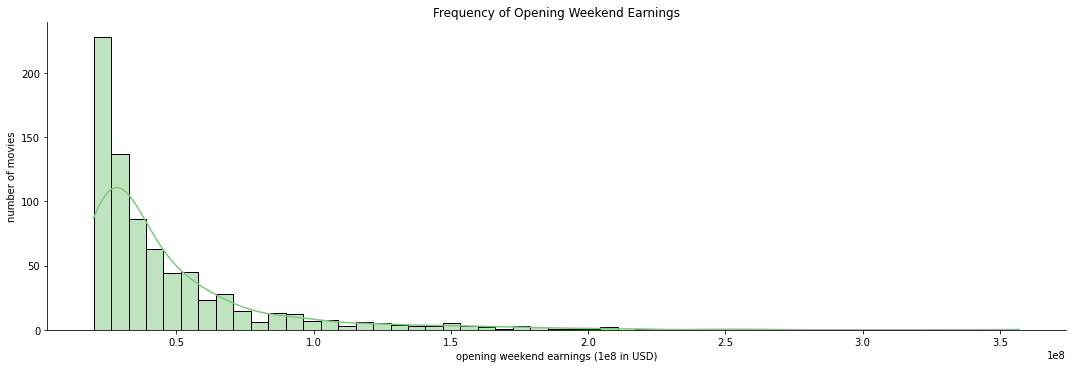

In [209]:
# distribution of opening weekend earnings before outlier removal
sns.set_palette(sns.color_palette("Accent", 1))
ax = sns.displot(opening_weekend_df['opening'], kde=True, height=5, aspect=3)

ax.set_axis_labels("opening weekend earnings (1e8 in USD)", "number of movies")
ax.set(title="Frequency of Opening Weekend Earnings")
plt.show()

In [210]:
# determining quartiles
q1 = opening_weekend_df['opening'].describe()[4]
q3 = opening_weekend_df['opening'].describe()[6]
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
lower_bound, upper_bound

(-19672020.125, 98719598.875)

In [211]:
# looking at the movies with revenues above the upper bound
outliers = opening_weekend_df[opening_weekend_df['opening'] > upper_bound]
outliers

rank                                               name    opening  \
0      1                                  Avengers: Endgame  357115007   
1      2                             Avengers: Infinity War  257698183   
2      3         Star Wars: Episode VII - The Force Awakens  247966675   
3      4            Star Wars: Episode VIII - The Last Jedi  220009584   
4      5                                     Jurassic World  208806270   
5      6                                       The Avengers  207438708   
6      7                                      Black Panther  202003951   
7      8                                      The Lion King  191770759   
8      9                            Avengers: Age of Ultron  191271109   
9     10                                      Incredibles 2  182687905   
10    11                         Captain America: Civil War  179139142   
11    12      Star Wars: Episode IX - The Rise of Skywalker  177383864   
12    13                               Beauty and the Beast  174750616   
13    14                                         Iron Man 3  174144585   
14    15       Harry Potter and the Deathly Hallows: Part 2  169189427   
15    16                 Batman v Superman: Dawn of Justice  166007347   
16    17                              The Dark Knight Rises  160887295   
17    18                                    The Dark Knight  158411483   
18    19                    The Hunger Games: Catching Fire  158074286   
19    20                       Rogue One: A Star Wars Story  155081681   
20    21                                     Captain Marvel  153433423   
21    22                                   The Hunger Games  152535747   
22    23                                       Spider-Man 3  151116516   
23    24                     Jurassic World: Fallen Kingdom  148024610   
24    25                                          Furious 7  147187040   
25    26                     Guardians of the Galaxy Vol. 2  146510104   
26    27                        The Twilight Saga: New Moon  142839137   
27    28          The Twilight Saga: Breaking Dawn - Part 2  141067634   
28    29          The Twilight Saga: Breaking Dawn - Part 1  138122261   
29    30         Pirates of the Caribbean: Dead Man's Chest  135634554   
30    31                                       Finding Dory  135060273   
31    32                                      Suicide Squad  133682248   
32    33                                           Deadpool  132434639   
33    34                                          Frozen II  130263358   
34    35                                         Iron Man 2  128122480   
35    36                                         Deadpool 2  125507153   
36    37       Harry Potter and the Deathly Hallows: Part 1  125017372   
37    38                                                 It  123403419   
38    39                                     Thor: Ragnarok  122744989   
39    40              The Hunger Games: Mockingjay - Part 1  121897634   
40    41                                    Shrek the Third  121629270   
41    42                                        Toy Story 4  120908065   
42    43                             Spider-Man: Homecoming  117027503   
43    44                                       Man of Steel  116619362   
44    45                                Alice in Wonderland  116101023   
45    46                                            Minions  115718405   
47    48           Pirates of the Caribbean: At World's End  114732820   
48    49                                        Toy Story 3  110307189   
49    50                Transformers: Revenge of the Fallen  108966307   
50    51       Star Wars: Episode III - Revenge of the Sith  108435841   
51    52                                            Shrek 2  108037878   
52    53                            The Secret Life of Pets  104352905   
53    54                                    The Jungle Book  103261464   
54    55

In [212]:
# removing all outliers from dataset
no_outliers_df = opening_weekend_df.copy()
outlier_list = outliers.name.tolist()
outlier_list

for movie in outlier_list:
    indices = no_outliers_df[no_outliers_df['name'] == movie].index
    no_outliers_df.drop(indices, inplace = True)

In [213]:
# THIS DATAFRAME HAS NO OUTLIERS, USE OPENING_WEEKEND_DF TO INCLUDE OUTLIERS
no_outliers_df.head()

rank                                 name   opening      total  \
61    62                             Iron Man  98618668  318604126   
62    63       Transformers: Dark of the Moon  97852865  352390543   
63    64                     Fast & Furious 6  97375245  238679850   
64    65                                Joker  96202337  335451311   
65    66  Captain America: The Winter Soldier  95023721  259766572   

    open_percent  theaters  average        date  \
61          31.0      4105    24024  2008-05-02   
62          27.8      4088    23936  2011-06-29   
63          40.8      3658    26619  2013-05-24   
64          28.7      4374    21994  2019-10-04   
65          36.6      3938    24129  2014-04-04   

                                   dist  
61                   Paramount Pictures  
62                           DreamWorks  
63                   Universal Pictures  
64                         Warner Bros.  
65  Walt Disney Studios Motion Pictures

In [214]:
print(no_outliers_df.describe())
no_outliers_df.to_csv('data/no_outliers.csv')

             rank       opening         total  open_percent     theaters  \
count  704.000000  7.040000e+02  7.040000e+02    704.000000   704.000000   
mean   515.620739  3.818596e+07  1.241467e+08     33.176847  3406.261364   
std    272.583044  1.810523e+07  7.117028e+07      8.611834   538.345838   
min     62.000000  1.981058e+07  3.434194e+07      8.900000   683.000000   
25%    273.750000  2.438911e+07  7.311826e+07     27.500000  3082.750000   
50%    511.000000  3.155911e+07  1.026592e+08     32.700000  3439.000000   
75%    749.250000  4.703110e+07  1.583017e+08     38.700000  3777.250000   
max    999.000000  9.861867e+07  7.497661e+08     63.600000  4634.000000   

            average  
count    704.000000  
mean   11107.528409  
std     4553.461177  
min     4859.000000  
25%     7732.500000  
50%     9949.000000  
75%    13210.750000  
max    45560.000000  


The mean recorded earlier for all movies' opening weekend revenue was 4.725279e+07. After removing outliers, we observe that the center of the data has shifted to a lower amount between 3e+07 and 4e+07.

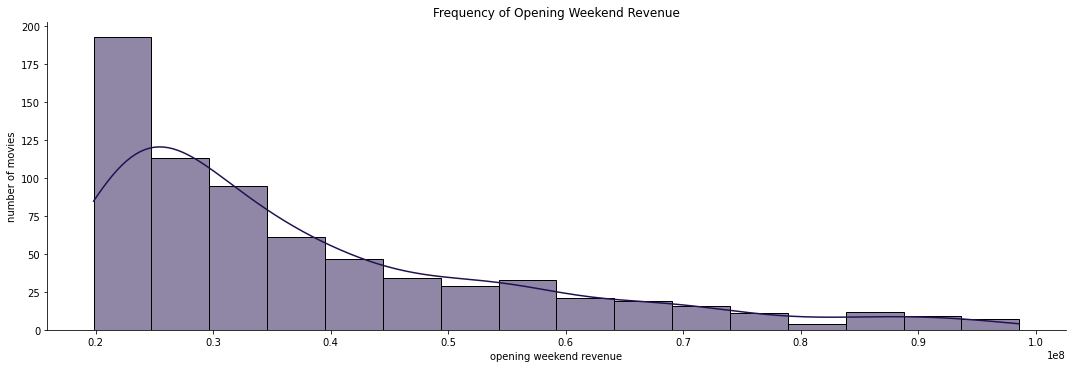

In [215]:
# distribution of opening weekend revenue without outliers
sns.set_palette(sns.color_palette("magma"),1)
ax = sns.displot(no_outliers_df['opening'], kde=True, height=5, aspect=3)

ax.set(title="Frequency of Opening Weekend Revenue")
ax.set_axis_labels("opening weekend revenue", "number of movies")
plt.show()

Using `no_outliers_df`, we plotted the frequency of the opening weekend earnings again, and the resulting histogram (in purple) shows a less extreme right skew in comparison to the previous histogram (in green). Without outliers, the average amount of revenue a movie earns during their opening weekend is around \\$38,000,000 which is about \\$8,000,000 less than the average amount of revenue of the movies in the original dataset.

### Studying the relationship between Movie Distributors and Total Opening Weekend Revenue

After, we decided to study the relationship between movie distributors and the total opening weekend revenue in order to see which movie distributor amassed a larger amount of opening weekend revenue. We first grouped all the opening weekend revenues by the distributors using `groupby`, and we placed the resulting data in `dist_revenue_df`.

In [216]:
# group the movies by their shared distributors and find the total sum of their opening weekend earnings
grouped_dist_df = no_outliers_df.groupby(["dist"]).sum().reset_index()
dist_revenue_df = grouped_dist_df[['dist', 'opening']]
dist_revenue_df = dist_revenue_df.sort_values(by='opening', ascending=False).reset_index(drop=True)
dist_revenue_df.describe()

opening
count  3.000000e+01
mean   8.960972e+08
std    1.518259e+09
min    2.049760e+07
25%    2.865000e+07
50%    9.979421e+07
75%    8.334361e+08
max    4.982723e+09

In [217]:
dist_revenue_df.head()

dist     opening
0                         Warner Bros.  4982722638
1                   Universal Pictures  4238271550
2                Twentieth Century Fox  3791487942
3  Walt Disney Studios Motion Pictures  3695427034
4    Sony Pictures Entertainment (SPE)  3329397074

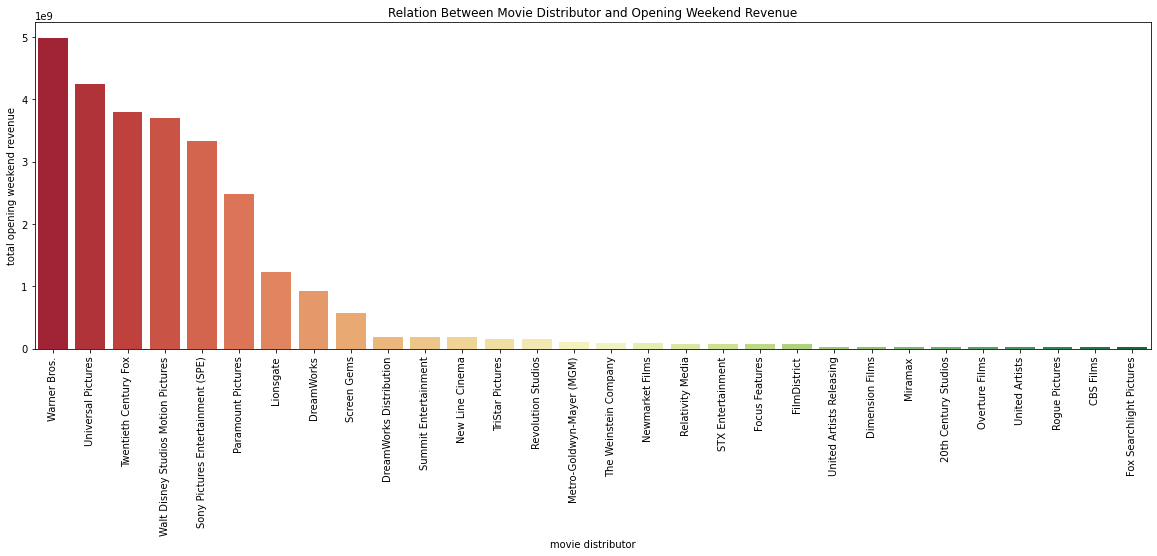

In [218]:
# total opening weekend revenues by movie distributor

plt.figure(figsize=(20,6))
ax = sns.barplot(x="dist", y="opening", data=dist_revenue_df, palette=sns.color_palette("RdYlGn", 30))
ax.set(title="Relation Between Movie Distributor and Opening Weekend Revenue")
ax.set_xticklabels(dist_revenue_df['dist'], rotation = 90)
ax.set(xlabel='movie distributor', ylabel='total opening weekend revenue')
plt.show()

Unsurprisingly, Warner Bros. comes out at top with opening revenue while Universal Pictures has the second highest total opening weekend revenue. Note that out of the 30 distributors here, only 8 of them have total earnings the mean: 8.580822e+08. This shows that the more well-known distributors tend to garner a higher opening weekend revenue in comparison to lesser known distributors. More revenue could mean a higher budget for future films, which could then lead to higher impact marketing and an increase in movie searches.

### Studying the relationship between Year and Total Opening Weekend Revenue

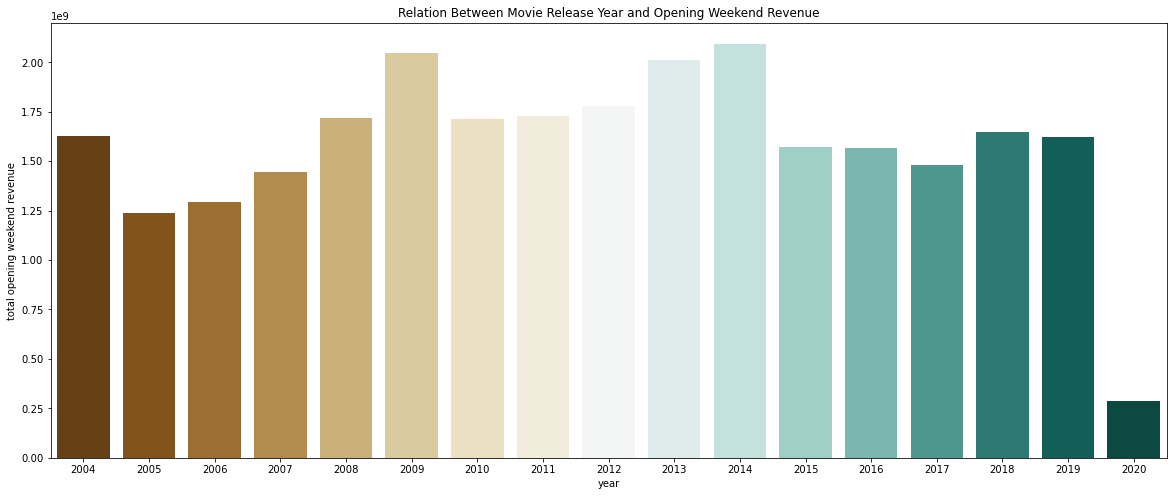

In [219]:
# observing how total opening weekend revenue changed from 2004 to 2020

# tailoring dataset by grouping movies by the year of their release and find the total sum of their opening weekend earnings
year_df = no_outliers_df
year_df[['year','month','day']] = year_df.date.str.split("-", expand=True) 
grouped_year_df = year_df.groupby(['year']).sum().reset_index()
year_revenue_df = grouped_year_df[['year', 'opening']]
year_revenue_df.head()

# plot configurations
plt.figure(figsize=(20,8))
ax = sns.barplot(x="year", y="opening", palette=sns.color_palette("BrBG", 17), data=year_revenue_df)
ax.set(title="Relation Between Movie Release Year and Opening Weekend Revenue")
ax.set(xlabel='year', ylabel='total opening weekend revenue')
plt.show()

In [220]:
# finding number of movies in list made in 2020
movies_in_2020 = year_df[year_df['year'] == '2020']
print("Number of top 1000 box office earnings movies in 2020:", len(movies_in_2020))
movies_in_2020

Number of top 1000 box office earnings movies in 2020: 8


rank                  name   opening      total  open_percent  theaters  \
159   160     Bad Boys for Life  62504105  206305244          30.3      3775   
180   181    Sonic the Hedgehog  58018348  148974665          39.0      4167   
373   374                Onward  39119861   61555145          63.6      4310   
484   485         Birds of Prey  33010017   84158461          39.2      4236   
613   614     The Invisible Man  28205665   70410000          40.1      3610   
726   727  The Call of the Wild  24791624   62342368          39.8      3752   
869   870              Dolittle  21844045   77047065          28.4      4155   
972   973                 Tenet  20200000   57929000          34.9      2810   

     average        date                                 dist  year month day  
159    16557  2020-01-17    Sony Pictures Entertainment (SPE)  2020    01  17  
180    13923  2020-02-14                   Paramount Pictures  2020    02  14  
373     9076  2020-03-06  Walt Disney Studios Motion Pictures  2020    03  06  
484     7792  2020-02-07                         Warner Bros.  2020    02  07  
613     7813  2020-02-28                   Universal Pictures  2020    02  28  
726     6607  2020-02-21                 20th Century Studios  2020    02  21  
869     5257  2020-01-17                   Universal Pictures  2020    01  17  
972     7188  2020-09-03                         Warner Bros.  2020    09  03

In [221]:
# finding number stats on # of movies made per year
print(year_df['year'].value_counts())
print()
print("Average number of top box office earning movies from 2004-2019:", np.mean(year_df[year_df['year'] != '2020']['year'].value_counts()))

2009    54
2013    52
2010    49
2012    48
2014    48
2008    46
2004    45
2016    44
2011    43
2006    41
2018    40
2019    39
2017    37
2015    37
2005    37
2007    36
2020     8
Name: year, dtype: int64

Average number of top box office earning movies from 2004-2019: 43.5


2020 appears to be doing rather poorly compared to previous years. A closer look at the data tells us that only 8 movies from 2020 made it to the top 1000 box office earners list. The average number of movies to make the list per each year is 43 and the range is 18.

### Checking for outliers in movie interest data:

We checked for outliers using the code below. We looked for max search popularities that exceeded Avenger's Endgame. We found 200 movies that exceeded Avengers: Endgame, but on manually checking with Google Trends, we found that many of these movies did not actually exceed the popularity of Avengers: Endgame. Instead of finding outliers, we found that the way we collected data for search trends was incorrect. To fix it, we used Google suggestions to narrow down our search to be specific to film searches of our movies, not just any search. Upon doing this, we fixed the errors in our data. The changes can be found in the data cleaning section, in the code starting with comment "Pulling search keywords from pytrends."

In [222]:
# Bits of code we wrote finding that our data was incorrect
test = movie_interest_df.transpose().describe()
test = test.transpose()
# Displayed all movies with higher search popularity. 
# Will display different output after data was fixed
# 46 was used because Avengers: Endgame had max search popularity of 46
test[test['max'] > 46]

count      mean       std  min  \
movie                                                                          
Avengers: Endgame                             206.0  3.480583  9.013113  0.0   
Fifty Shades of Grey                          206.0  2.504854  5.615091  0.0   
The Dark Knight                               206.0  2.359223  4.866720  0.0   
The Hunger Games: Catching Fire               206.0  3.461165  7.046601  0.0   
The Incredibles                               206.0  1.815534  3.891824  0.0   
Star Wars: Episode III - Revenge of the Sith  206.0  2.359223  4.550753  1.0   
Deadpool                                      206.0  2.111650  4.879240  0.0   
Rogue One: A Star Wars Story                  206.0  0.771845  5.223902  0.0   
Jurassic World                                206.0  1.334951  4.195170  0.0   
Star Wars: Episode VIII - The Last Jedi       206.0  1.563107  4.124099  0.0   
Black Panther                                 206.0  1.378641  6.151925  0.0   
Batman Begins                                 206.0  2.359223  4.866720  0.0   
The Avengers                                  206.0  4.490291  8.339585  0.0   
Avengers: Infinity War                        206.0  1.665049  5.298821  0.0   
Star Wars: Episode VII - The Force Awakens    206.0  3.082524  6.170582  1.0   
The Dark Knight Rises                         206.0  1.092233  3.776208  0.0   
Suicide Squad                                 206.0  1.189320  4.318772  0.0   
Twilight                                      206.0  6.631068  9.860975  0.0   
It                                            206.0  1.689320  4.502637  0.0   

                                              25%  50%  75%    max  
movie                                                               
Avengers: Endgame                             0.0  2.0  3.0  100.0  
Fifty Shades of Grey                          0.0  1.0  3.0   60.0  
The Dark Knight                               1.0  1.0  2.0   55.0  
The Hunger Games: Catching Fire               0.0  2.0  4.0   79.0  
The Incredibles                               1.0  1.0  2.0   51.0  
Star Wars: Episode III - Revenge of the Sith  1.0  1.0  2.0   48.0  
Deadpool                                      0.0  1.0  2.0   53.0  
Rogue One: A Star Wars Story                  0.0  0.0  0.0   73.0  
Jurassic World                                0.0  0.0  1.0   50.0  
Star Wars: Episode VIII - The Last Jedi       0.0  1.0  2.0   49.0  
Black Panther                                 0.0  0.0  1.0   77.0  
Batman Begins                                 1.0  1.0  2.0   55.0  
The Avengers                                  0.0  3.0  5.0   69.0  
Avengers: Infinity War                        0.0  0.0  1.0   50.0  
Star Wars: Episode VII - The Force Awakens    1.0  2.0  3.0   76.0  
The Dark Knight Rises                         0.0  0.0  1.0   48.0  
Suicide Squad                                 0.0  0.0  1.0   55.0  
Twilight                                      2.0  3.0  6.0   81.0  
It                                            1.0  1.0  1.0   53.0

After fixing our data, only Avengers: Endgame had max of 100, as we expected, based on the virality of the movie and its general popularity in internet culture. To check for further anomalies, we selected movies from the data at random and manually checked them with Google Trends.

In [223]:
# After fixing our data, we found the following 
test = movie_interest_df.transpose().describe().transpose()
test[test['max']==100]

count      mean       std  min  25%  50%  75%    max
movie                                                                  
Avengers: Endgame  206.0  3.480583  9.013113  0.0  0.0  2.0  3.0  100.0

Unfortunately, our fix had some flaws. Some movies were conflated with other, less popular search terms, resulting in some movies having max search popularity of zero. Others were searched too little to give us significant data. All of these movies can be seen below.

In [224]:
test[test['max'] == 0]

count  mean  std  min  25%  50%  75%  \
movie                                                                           
The Other Woman                          206.0   0.0  0.0  0.0  0.0  0.0  0.0   
White Noise                              206.0   0.0  0.0  0.0  0.0  0.0  0.0   
The Strangers                            206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Gravity                                  206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Super 8                                  206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Beverly Hills Chihuahua                  206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Sing                                     206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Us                                       206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Marley & Me                              206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Neighbors                                206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Bewitched                                206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Notorious                                206.0   0.0  0.0  0.0  0.0  0.0  0.0   
The Perfect Guy                          206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Tomb Raider                              206.0   0.0  0.0  0.0  0.0  0.0  0.0   
The Longest Yard                         206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Prisoners                                206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Beowulf                                  206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Big Momma's House 2                      206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Oblivion                                 206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Dark Shadows                             206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Rocketman                                206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Fantastic Beasts and Where to Find Them  206.0   0.0  0.0  0.0  0.0  0.0  0.0   
Cinderella                               206.0   0.0  0.0  0.0  0.0  0.0  0.0   
The Interpreter                          206.0   0.0  0.0  0.0  0.0  0.0  0.0   

                                         max  
movie                                         
The Other Woman                          0.0  
White Noise                              0.0  
The Strangers                            0.0  
Gravity                                  0.0  
Super 8                                  0.0  
Beverly Hills Chihuahua                  0.0  
Sing                                     0.0  
Us                                       0.0  
Marley & Me                              0.0  
Neighbors                                0.0  
Bewitched                                0.0  
Notorious                                0.0  
The Perfect Guy                          0.0  
Tomb Raider                              0.0  
The Longest Yard                         0.0  
Prisoners                                0.0  
Beowulf                                  0.0  
Big Momma's House 2                      0.0  
Oblivion                                 0.0  
Dark Shadows                             0.0  
Rocketman                                0.0  
Fantastic Beasts and Where to Find Them  0.0  
Cinderella                               0.0  
The Interpreter                          0.0

So, we decided to drop these movies from our dataset.

In [225]:
movie_interest_df = movie_interest_df.drop(test[test['max'] == 0].index)

In [226]:
movie_interest_df.head()

2004-01-01  2004-02-01  2004-03-01  2004-04-01  \
movie                                                                        
Vantage Point                        0           0           0           0   
Cars                                 0           0           0           0   
Big Hero 6                           0           0           0           0   
Avengers: Endgame                    0           0           0           0   
xXx: Return of Xander Cage           0           0           0           0   

                            2004-05-01  2004-06-01  2004-07-01  2004-08-01  \
movie                                                                        
Vantage Point                        0           0           0           0   
Cars                                 0           0           0           0   
Big Hero 6                           0           0           0           0   
Avengers: Endgame                    0           0           0           0   
xXx: Return of Xander Cage           0           0           0           0   

                            2004-09-01  2004-10-01  ...  2020-05-01  \
movie                                               ...               
Vantage Point                        0           0  ...           0   
Cars                                 0           0  ...           1   
Big Hero 6                           0           0  ...           1   
Avengers: Endgame                    0           0  ...           5   
xXx: Return of Xander Cage           0           0  ...           0   

                            2020-06-01  2020-07-01  2020-08-01  2020-09-01  \
movie                                                                        
Vantage Point                        0           0           0           0   
Cars                                 1           1           1           1   
Big Hero 6                           1           0           0           1   
Avengers: Endgame                    4           4           5           5   
xXx: Return of Xander Cage           0           0           0           0   

                            2020-10-01  2020-11-01  2020-12-01  2021-01-01  \
movie                                                                        
Vantage Point                        0           0           0           0   
Cars                                 1           1           1           1   
Big Hero 6                           0           0           1           1   
Avengers: Endgame                    4           4           4           5   
xXx: Return of Xander Cage           0           0           0           0   

                            2021-02-01  
movie                                   
Vantage Point                        0  
Cars                                 1  
Big Hero 6                           1  
Avengers: Endgame                    6  
xXx: Return of Xander Cage           0  

[5 rows x 206 columns]

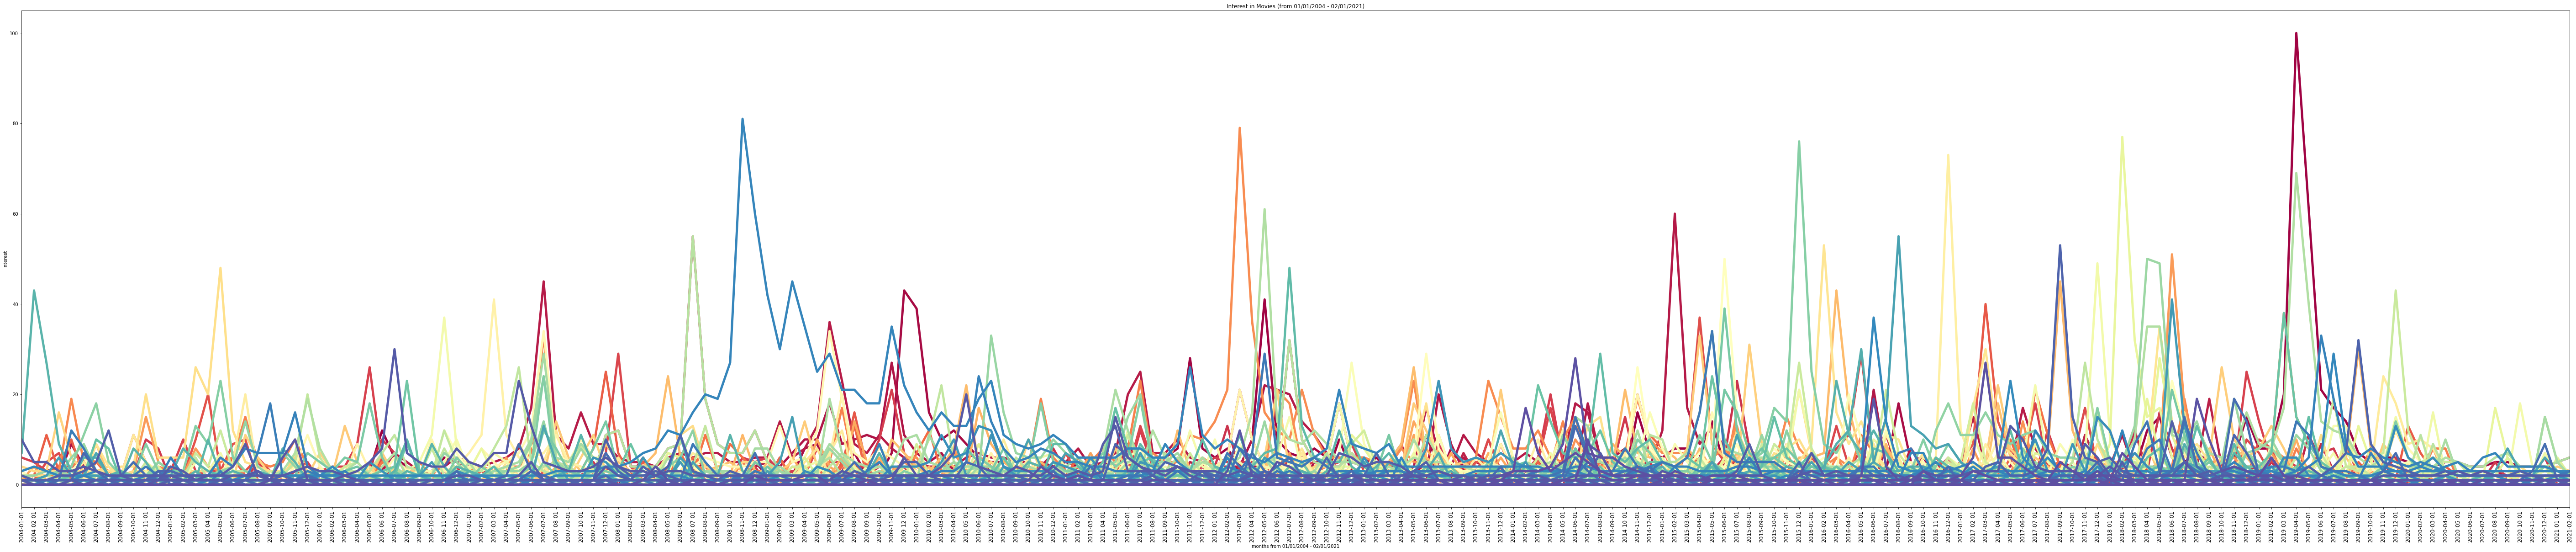

In [227]:
# observing how interest in a movie changed from 2004-2020 by month

total_interest = movie_interest_df.transpose()

# plot configurations
cmap = plt.get_cmap("Spectral")

ax = total_interest.plot(figsize=(100,20), colormap=cmap,linewidth=5)
ax.legend().remove()
ax.set(title="Interest in Movies (from 01/01/2004 - 02/01/2021)")
ax.set(xlabel='months from 01/01/2004 - 02/01/2021', ylabel='interest')

plt.xticks(list(range(len(movie_interest_df.columns))), movie_interest_df.columns, rotation=90, fontsize=12)
plt.show()

A brief graph to illustrate all the data in the movie_interest dataset. The legend for which lines correlating to what movies was removed on purpose due to the sheer number of movies as we are only interested in this graph out of curiosity for the scope of our data. Curiously, we note that large spikes tend to occur during the summer months. We will explore this further in our linear models.

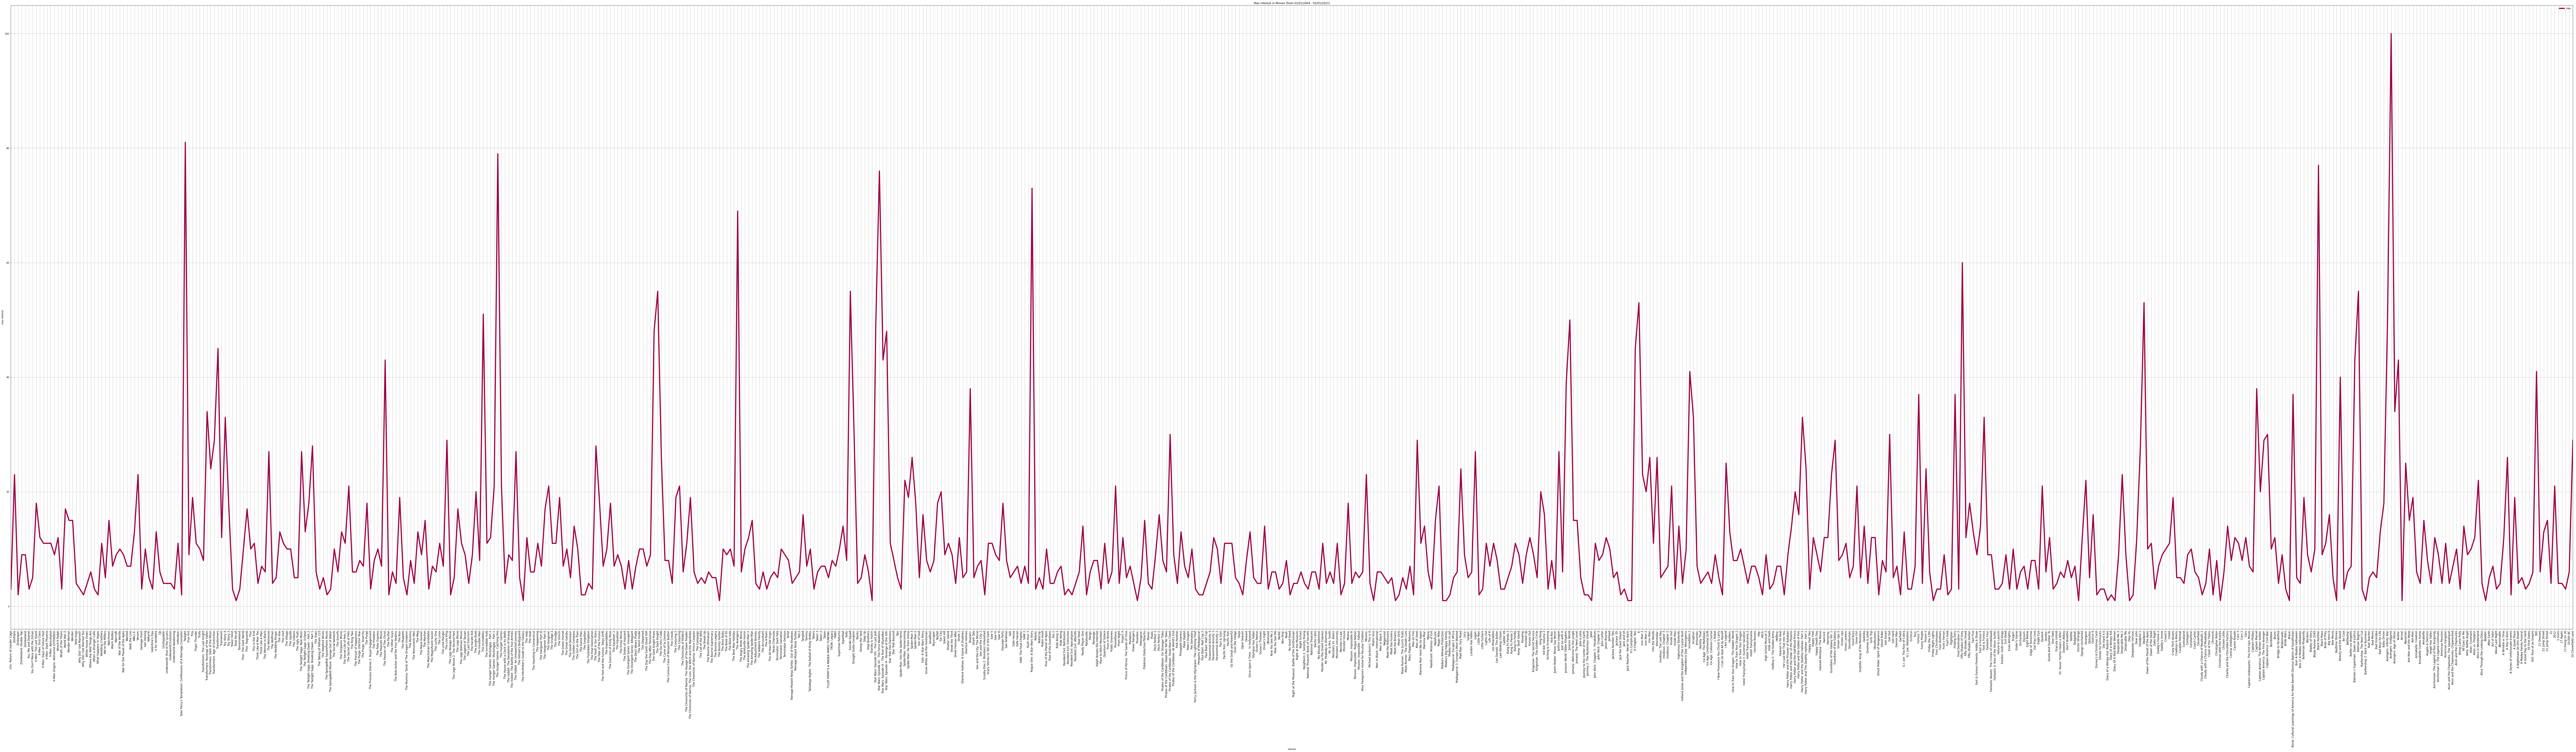

In [228]:
# we are interested in the max height of popularity reached by the films
max_popularity = movie_interest_df.transpose().describe().loc['max':]
max_popularity = max_popularity.transpose().reset_index()
max_popularity = max_popularity.sort_values('movie', ascending = False).reset_index(drop=True)

# plot configurations
ax = max_popularity.plot(x='movie', y='max',figsize=(200,50),colormap=cmap,linewidth=5)
ax.set(title="Max Interest in Movies (from 01/01/2004 - 02/01/2021)")
ax.set(xlabel='movies', ylabel='max interest')
plt.xticks(list(range(len(max_popularity['movie']))), max_popularity['movie'], rotation=90, fontsize=12)

ax.grid(b=True, which='major', color='gray', linewidth=0.5)

plt.show()

We also analyzed the peak popularity reached by each film. "Peak" is calculated by finding the max popularity for each film over the 206 months of data for movie interest. As expected, the highest spike is Avenger’s Endgame, which has a max popularity of 100. Other large spikes of interest include Twilight, Star Wars: The Force Awakens, and Black Panther. Most spikes belong to movies with genres related to action/adventure or romance. 

In [229]:
max_popularity.describe()

max
count  706.000000
mean    10.985836
std     11.937417
min      1.000000
25%      4.000000
50%      7.000000
75%     12.000000
max    100.000000

In [230]:
# finding quartiles
q1 = max_popularity.describe().iloc[4]
q3 = max_popularity.describe().iloc[6]
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
lower_bound, upper_bound

(max   -8.0
 dtype: float64,
 max    24.0
 dtype: float64)

In [231]:
max_popularity.shape

(706, 2)

We have found that our outliers lie in the range above 24 in terms of search popularity. However, eliminating this data means ridding our dataset of the movies that we are interested in, as we wish to detect the relationship in the success of a movie during its opening weekend release and its search popularity. Therefore, we will keep the data as is.

In [232]:
movies_below_upper_bound = max_popularity[max_popularity['max'] < 24]
movies_below_upper_bound

movie   max
0    xXx: Return of Xander Cage   3.0
1                      Zootopia  23.0
2                     Zookeeper   2.0
3        Zombieland: Double Tap   9.0
4                    Zombieland   9.0
..                          ...   ...
700                        2012  21.0
701                      2 Guns   4.0
702                    17 Again   4.0
703              13 Going on 30   3.0
704                   10,000 BC   6.0

[637 rows x 2 columns]

## Data Analysis & Results (EDA):

### Analyzing all opening-weekend earning movies and their search popularity:

In [233]:
# loading datasets
no_outliers_opening_weekend_df = pd.read_csv('data/no_outliers.csv')

top_earning_movies = no_outliers_opening_weekend_df[['name', 'opening', 'date']]
top_earning_movies

name   opening        date
0                               Iron Man  98618668  2008-05-02
1         Transformers: Dark of the Moon  97852865  2011-06-29
2                       Fast & Furious 6  97375245  2013-05-24
3                                  Joker  96202337  2019-10-04
4    Captain America: The Winter Soldier  95023721  2014-04-04
..                                   ...       ...         ...
699             The Manchurian Candidate  20018620  2004-07-30
700                      Pitch Perfect 3  19928525  2017-12-22
701                                Ouija  19875995  2014-10-24
702                             Kick-Ass  19828687  2010-04-16
703                           The Unborn  19810585  2009-01-09

[704 rows x 3 columns]

In [234]:
movie_interest_df = movie_interest_df.reset_index()
top_earning_movies_interest = movie_interest_df[movie_interest_df['movie'].isin(list(top_earning_movies['name']))]

In [235]:
# preparing dataframes for merging and removing day from the dates
top_earning_movies_interest = top_earning_movies_interest.rename(columns={"movie": "name"})
top_earning_movies_interest = top_earning_movies_interest.rename(columns = lambda end: end[:-3] if end.endswith('-01') else end)
top_earning_movies_interest

name  2004-01  2004-02  2004-03  \
0                                  Vantage Point        0        0        0   
1                                           Cars        0        0        0   
2                                     Big Hero 6        0        0        0   
4                     xXx: Return of Xander Cage        0        0        0   
5    Miss Peregrine's Home for Peculiar Children        0        0        0   
..                                           ...      ...      ...      ...   
701                  Kingsman: The Golden Circle        0        0        0   
702                       The Fault in Our Stars        0        0        0   
703                               The Lego Movie        0        0        0   
704                                 Peter Rabbit        0        0        0   
705               Dawn of the Planet of the Apes        0        0        0   

     2004-04  2004-05  2004-06  2004-07  2004-08  2004-09  ...  2020-05  \
0          0        0        0        0        0        0  ...        0   
1          0        0        0        0        0        0  ...        1   
2          0        0        0        0        0        0  ...        1   
4          0        0        0        0        0        0  ...        0   
5          0        0        0        0        0        0  ...        0   
..       ...      ...      ...      ...      ...      ...  ...      ...   
701        0        0        0        0        0        0  ...        0   
702        0        0        0        0        0        0  ...        0   
703        0        0        0        0        0        0  ...        1   
704        0        0        0        0        0        0  ...        0   
705        0        0        0        0        0        0  ...        0   

     2020-06  2020-07  2020-08  2020-09  2020-10  2020-11  2020-12  2021-01  \
0          0        0        0        0        0        0        0        0   
1          1        1        1        1        1        1        1        1   
2          1        0        0        1        0        0        1        1   
4          0        0        0        0        0        0        0        0   
5          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
701        0        0        0        0        0        0        0        0   
702        0        0        0        0        0        0        0        0   
703        0        0        0        0        0        0        0        0   
704        0        0        0        0        0        0        0        0   
705        0        0        0        0        0        0        0        0   

     2021-02  
0          0  
1          1  
2          1  
4          0  
5          0  
..       ...  
701        0  
702        0  
703        0  
704        0  
705        0  

[615 rows x 207 columns]

In [236]:
# merging dataframes: top opening weekend movies and movie interest (merged by name of the movie)
top_earning_movies_interest = top_earning_movies_interest.merge(top_earning_movies, how ='inner')
top_earning_movies_interest

name  2004-01  2004-02  2004-03  \
0                                  Vantage Point        0        0        0   
1                                           Cars        0        0        0   
2                                     Big Hero 6        0        0        0   
3                     xXx: Return of Xander Cage        0        0        0   
4    Miss Peregrine's Home for Peculiar Children        0        0        0   
..                                           ...      ...      ...      ...   
610                  Kingsman: The Golden Circle        0        0        0   
611                       The Fault in Our Stars        0        0        0   
612                               The Lego Movie        0        0        0   
613                                 Peter Rabbit        0        0        0   
614               Dawn of the Planet of the Apes        0        0        0   

     2004-04  2004-05  2004-06  2004-07  2004-08  2004-09  ...  2020-07  \
0          0        0        0        0        0        0  ...        0   
1          0        0        0        0        0        0  ...        1   
2          0        0        0        0        0        0  ...        0   
3          0        0        0        0        0        0  ...        0   
4          0        0        0        0        0        0  ...        0   
..       ...      ...      ...      ...      ...      ...  ...      ...   
610        0        0        0        0        0        0  ...        0   
611        0        0        0        0        0        0  ...        0   
612        0        0        0        0        0        0  ...        0   
613        0        0        0        0        0        0  ...        0   
614        0        0        0        0        0        0  ...        0   

     2020-08  2020-09  2020-10  2020-11  2020-12  2021-01  2021-02   opening  \
0          0        0        0        0        0        0        0  22874936   
1          1        1        1        1        1        1        1  60119509   
2          0        1        0        0        1        1        1  56215889   
3          0        0        0        0        0        0        0  20130142   
4          0        0        0        0        0        0        0  28871140   
..       ...      ...      ...      ...      ...      ...      ...       ...   
610        0        0        0        0        0        0        0  39023010   
611        0        0        0        0        0        0        0  48002523   
612        0        0        0        0        0        0        0  69050279   
613        0        0        0        0        0        0        0  25010928   
614        0        0        0        0        0        0        0  72611427   

           date  
0    2008-02-22  
1    2006-06-09  
2    2014-11-07  
3    2017-01-20  
4    2016-09-30  
..          ...  
610  2017-09-22  
611  2014-06-06  
612  2014-02-07  
613  2018-02-09  
614  2014-07-11  

[615 rows x 209 columns]

In [237]:
# search popularity for all movies in the month prior to their release: these values are saved to the column 'pre_interest'
top_earning_movies_interest['pre_interest'] = range(len(top_earning_movies_interest))
for i, movie in enumerate(list(top_earning_movies_interest['name'])):
    release_date = top_earning_movies_interest[top_earning_movies_interest['name'] == movie]['date'][i][:7]
    popularity = top_earning_movies_interest.at[i, release_date]
    top_earning_movies_interest.at[i, 'pre_interest'] = popularity
top_earning_movies_interest = top_earning_movies_interest[['name', 'opening', 'pre_interest']]
top_earning_movies_interest

name   opening  pre_interest
0                                  Vantage Point  22874936             3
1                                           Cars  60119509            12
2                                     Big Hero 6  56215889            16
3                     xXx: Return of Xander Cage  20130142             3
4    Miss Peregrine's Home for Peculiar Children  28871140             3
..                                           ...       ...           ...
610                  Kingsman: The Golden Circle  39023010             5
611                       The Fault in Our Stars  48002523            28
612                               The Lego Movie  69050279            17
613                                 Peter Rabbit  25010928             7
614               Dawn of the Planet of the Apes  72611427            10

[615 rows x 3 columns]

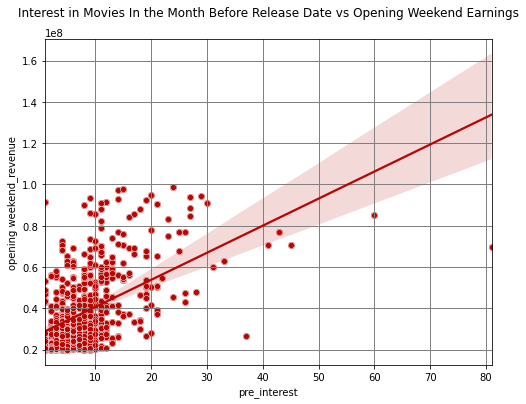

In [238]:
# comparing the interest in movies in the month before the release date to their opening weekend revenue
top_earning_movies_interest = top_earning_movies_interest[top_earning_movies_interest["pre_interest"] != 0]

# plot configurations
plt.figure(figsize=(8,6))
sns.set_palette(sns.color_palette("OrRd_r"))

ax = sns.regplot(x="pre_interest", y="opening", data=top_earning_movies_interest)
ax2 = sns.scatterplot(x="pre_interest", y="opening", data=top_earning_movies_interest)
ax.set(title="Interest in Movies In the Month Before Release Date vs Opening Weekend Earnings")

ax.title.set_position([.5, 1.05])
ax.grid(b=True, which='major', color='gray', linewidth=1.0)
ax.grid(b=True, which='minor', color='gray', linewidth=0.5)
ax.set_xlabel("pre_interest")
ax.set_ylabel("opening weekend_revenue")

plt.show()

As seen above, the prerelease interest appears to have a positive relationship with opening revenue. There are some outliers, but we left the outliers in for visualization purposes. Now, let's take a look at the graph without the outliers.

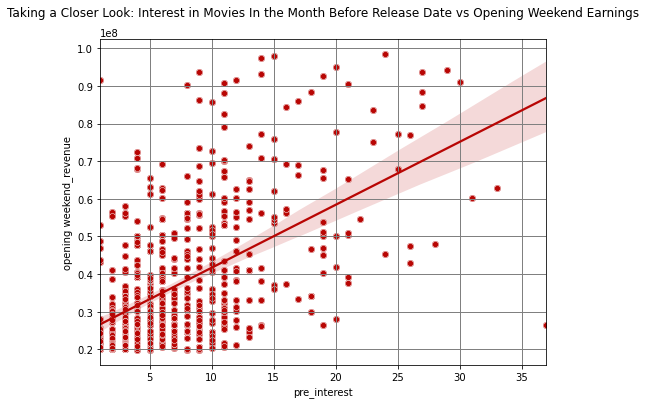

In [239]:
# taking a closer look:
# comparing the interest in movies in the month before the release date to their opening weekend revenue, without outliers

# removing outliers
no_outliers_interest_opening_weekend = top_earning_movies_interest[top_earning_movies_interest['pre_interest'] <= 40]

# plot configurations
plt.figure(figsize=(8,6))

sns.set_palette(sns.color_palette("OrRd_r"))
ax = sns.regplot(x="pre_interest", y="opening", data=no_outliers_interest_opening_weekend)
ax2 = sns.scatterplot(x="pre_interest", y="opening", data=no_outliers_interest_opening_weekend, palette=sns.color_palette("Oranges", len(top_earning_movies_interest)))
ax.set(title="Taking a Closer Look: Interest in Movies In the Month Before Release Date vs Opening Weekend Earnings")

ax.title.set_position([.5, 1.05])
ax.grid(b=True, which='major', color='gray', linewidth=1.0)
ax.grid(b=True, which='minor', color='gray', linewidth=0.5)
ax.set_xlabel("pre_interest")
ax.set_ylabel("opening weekend_revenue")

plt.show()

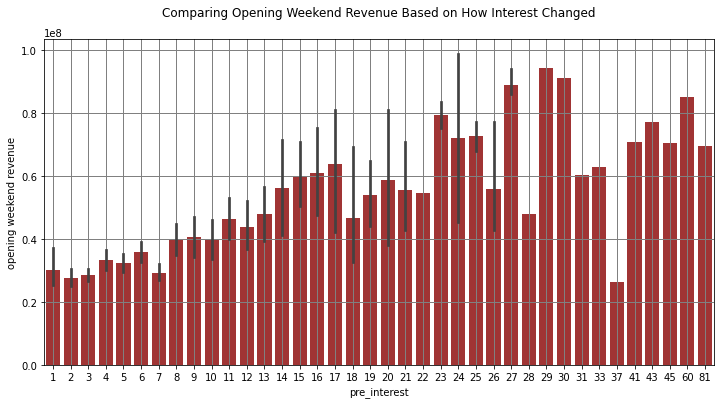

In [240]:
# exploring how opening weekend revenue changes based on pre-interest in movies

# plot configurations
plt.figure(figsize=(12,6))

sns.set_palette(sns.color_palette("OrRd_r"), 1)
ax = sns.barplot(x="pre_interest", y="opening", color='firebrick',data=top_earning_movies_interest)
ax.set(title="Comparing Opening Weekend Revenue Based on How Interest Changed")

ax.title.set_position([.5, 1.05])
ax.grid(b=True, which='major', color='gray', linewidth=1.0)
ax.grid(b=True, which='minor', color='gray', linewidth=0.5)
ax.set_xlabel("pre_interest")
ax.set_ylabel("opening weekend revenue")

plt.show()

In [241]:
# number of movies with a certain interest
top_earning_movies_interest["pre_interest"].value_counts(sort=False)

1     27
2     36
3     72
4     64
5     54
6     55
7     39
8     34
9     39
10    29
11    35
12    19
13    14
14    10
15    10
16     5
17     4
18     5
19    10
20     5
21     6
22     1
23     2
24     2
25     2
26     3
27     3
28     1
29     1
30     1
31     1
33     1
37     1
41     1
43     1
45     1
60     1
81     1
Name: pre_interest, dtype: int64

In [242]:
top_earning_movies_interest[top_earning_movies_interest["pre_interest"] >= 28]

name   opening  pre_interest
10                                              Avatar  77025481            43
25                                Fifty Shades of Grey  85171450            60
27                                        Transformers  70502384            45
201                                     It Chapter Two  91062152            30
231                             Straight Outta Compton  60200180            31
281                                                300  70885301            41
339  Borat: Cultural Learnings of America for Make ...  26455463            37
447                                          Inception  62785337            33
500                            Guardians of the Galaxy  94320883            29
557                                           Twilight  69637740            81
611                             The Fault in Our Stars  48002523            28

Note that interest from [28, 81] only consists of a single movie. If we take a closer look at these movies, they all are relatively high-earning movies.

As demonstrated by the scatterplots, movies that have less interest prior to their opening weekend tend to have lower opening weekend revenues. There is a general rise in opening weekend revenue with movies that have interest between 15 and 30. It is interesting to note that the outliers we marked (movies with interest greater than 40) all earned enough by themselves in terms of opening weekend revenue; they far surpass the revenue of numerous movies with varying interests less than 40.

### Linear Prediction Models and Variable Relationship Analysis:

First we removed any outliers we previously spotted from the data.

In [243]:
no_outliers_df = pd.read_csv('data/no_outliers.csv',index_col=0)
movie_interest_df = pd.read_csv('data/movie_interest.csv')
# Remove one movie causing problems with collecting data from month before its release date
no_outliers_df = no_outliers_df[no_outliers_df['date'] >= '2004-02-01']

# Format columns of movie interest dataframe to make it easier to work with
new_columns = []
for i in range(len(movie_interest_df.columns)):
    if i == 0:
        new_columns.append("movie")
    else:
        new_column = movie_interest_df.columns[i].split(' ')[0]
        new_columns.append(new_column)
movie_interest_df.columns = new_columns
movie_interest_df = movie_interest_df.set_index('movie')

# Gather all data without outliers
opening_weekend_df = no_outliers_df[no_outliers_df.name.isin(movie_interest_df.index)]
movie_interest_df = movie_interest_df[movie_interest_df.index.isin(opening_weekend_df.name)]

opening_weekend_df = opening_weekend_df.reset_index()
assert(opening_weekend_df.shape[0] == movie_interest_df.shape[0])
print("Number of movies: " + str(opening_weekend_df.shape[0]))
opening_weekend_df.head()

Number of movies: 638


index  rank                                 name   opening      total  \
0     61    62                             Iron Man  98618668  318604126   
1     62    63       Transformers: Dark of the Moon  97852865  352390543   
2     63    64                     Fast & Furious 6  97375245  238679850   
3     64    65                                Joker  96202337  335451311   
4     65    66  Captain America: The Winter Soldier  95023721  259766572   

   open_percent  theaters  average        date  \
0          31.0      4105    24024  2008-05-02   
1          27.8      4088    23936  2011-06-29   
2          40.8      3658    26619  2013-05-24   
3          28.7      4374    21994  2019-10-04   
4          36.6      3938    24129  2014-04-04   

                                  dist  
0                   Paramount Pictures  
1                           DreamWorks  
2                   Universal Pictures  
3                         Warner Bros.  
4  Walt Disney Studios Motion Pictures

In [244]:
movie_interest_df.head()

2004-01-01  2004-02-01  \
movie                                                                 
Vantage Point                                         0           0   
Cars                                                  0           0   
Big Hero 6                                            0           0   
xXx: Return of Xander Cage                            0           0   
Miss Peregrine's Home for Peculiar Children           0           0   

                                             2004-03-01  2004-04-01  \
movie                                                                 
Vantage Point                                         0           0   
Cars                                                  0           0   
Big Hero 6                                            0           0   
xXx: Return of Xander Cage                            0           0   
Miss Peregrine's Home for Peculiar Children           0           0   

                                             2004-05-01  2004-06-01  \
movie                                                                 
Vantage Point                                         0           0   
Cars                                                  0           0   
Big Hero 6                                            0           0   
xXx: Return of Xander Cage                            0           0   
Miss Peregrine's Home for Peculiar Children           0           0   

                                             2004-07-01  2004-08-01  \
movie                                                                 
Vantage Point                                         0           0   
Cars                                                  0           0   
Big Hero 6                                            0           0   
xXx: Return of Xander Cage                            0           0   
Miss Peregrine's Home for Peculiar Children           0           0   

                                             2004-09-01  2004-10-01  ...  \
movie                                                                ...   
Vantage Point                                         0           0  ...   
Cars                                                  0           0  ...   
Big Hero 6                                            0           0  ...   
xXx: Return of Xander Cage                            0           0  ...   
Miss Peregrine's Home for Peculiar Children           0           0  ...   

                                             2020-05-01  2020-06-01  \
movie                                                                 
Vantage Point                                         0           0   
Cars                                                  1           1   
Big Hero 6                                            1           1   
xXx: Return of Xander Cage                            0           0   
Miss Peregrine's Home for Peculiar Children           0           0   

                                             2020-07-01  2020-08-01  \
movie                                                                 
Vantage Point                                         0           0   
Cars                                                  1           1   
Big Hero 6                                            0           0   
xXx: Return of Xander Cage                            0           0   
Miss Peregrine's Home for Peculiar Children           0           0   

                                             2020-09-01  2020-10-01  \
movie                                                                 
Vantage Point                                         0           0   
Cars                                                  1           1   
Big Hero 6                                            1           0   
xXx: Return of Xander Cage                            0           0   
Miss Peregrine's Home for Peculiar Children           0           0   

                          

Since we could only get the search popularity of a movie on a month-by-month basis, we approximated the number of searches a movie got before release by summing the search popularity of the movie on the month of the release date, and the month before the release date. This captures all the cases where a movie is released in the beginning of the month or at the end of the month. We also separated the dates for ease of use.

In [245]:
def get_prerelease_search_pop(name, release_date):
    date_arr = release_date.split('-')
    month_of_release = date_arr[0] + '-' +date_arr[1] + "-01"
    year = int(date_arr[0])
    month = int(date_arr[1])
    month -= 1
    if month == 0:
        year -= 1
        if year == 2003:
            print("error, too far in past")
        month = 12
    str_year = str(year)
    str_month = str(month)
    if len(str_month) == 1:
        str_month = '0' + str_month
    month_before_release = str_year + '-' + str_month + "-01"
    pop_sum = movie_interest_df.loc[name,month_of_release] + movie_interest_df.loc[name,month_before_release]
    return pop_sum
def get_year(release_date):
    date_arr = release_date.split('-')
    return date_arr[0]
def get_month(release_date):
    date_arr = release_date.split('-')
    return date_arr[1]
def get_day(release_date):
    date_arr = release_date.split('-')
    return date_arr[2]

Having written the function to get the approximation of prerelease search popularity, we applied it to the opening weekend data to create a new column called search_pop. We also applied the date separating functions.

In [246]:
opening_weekend_df['search_pop'] = opening_weekend_df.apply(
    lambda row: get_prerelease_search_pop(row['name'],row['date']),axis=1)
opening_weekend_df['year'] = opening_weekend_df['date'].apply(get_year)
opening_weekend_df['month'] = opening_weekend_df['date'].apply(get_month)
opening_weekend_df['day'] = opening_weekend_df['date'].apply(get_day)

opening_weekend_df.head()

index  rank                                 name   opening      total  \
0     61    62                             Iron Man  98618668  318604126   
1     62    63       Transformers: Dark of the Moon  97852865  352390543   
2     63    64                     Fast & Furious 6  97375245  238679850   
3     64    65                                Joker  96202337  335451311   
4     65    66  Captain America: The Winter Soldier  95023721  259766572   

   open_percent  theaters  average        date  \
0          31.0      4105    24024  2008-05-02   
1          27.8      4088    23936  2011-06-29   
2          40.8      3658    26619  2013-05-24   
3          28.7      4374    21994  2019-10-04   
4          36.6      3938    24129  2014-04-04   

                                  dist  search_pop  year month day  
0                   Paramount Pictures          31  2008    05  02  
1                           DreamWorks          20  2011    06  29  
2                   Universal Pictures          16  2013    05  24  
3                         Warner Bros.           0  2019    10  04  
4  Walt Disney Studios Motion Pictures          26  2014    04  04

Once again, we found outliers with search_pop of 0. This indicates that our search was again conflated with some other search term. So we removed these outliers from our data.

In [247]:
# movies with search_pop 0
opening_weekend_df[opening_weekend_df['search_pop'] == 0]

index  rank                                     name   opening  \
3       64    65                                    Joker  96202337   
23      88    89                           Doctor Strange  85058311   
28      95    96                                    Venom  80255756   
37     107   108  Fantastic Beasts and Where to Find Them  74403387   
42     115   116                                       Us  71117625   
58     136   137                               Cinderella  67877361   
63     142   143                                    Brave  66323594   
66     145   146                                     Thor  65723338   
105    196   197                                  Gravity  55785112   
149    255   256                                Neighbors  49033915   
158    266   267                         The Longest Yard  47606480   
167    280   281                                   Trolls  46581142   
187    309   310                               The Croods  43639736   
215    357   358                              Cloverfield  40058229   
247    401   402                                 Oblivion  37054485   
250    407   408                              Marley & Me  36357586   
256    416   417                               Robin Hood  36063385   
267    431   432                                  Super 8  35451168   
270    435   436                                     Sing  35258145   
360    572   573                             Dark Shadows  29685274   
362    574   575                                    Creed  29632823   
366    581   582                           Now You See Me  29350389   
367    582   583                  Beverly Hills Chihuahua  29300465   
394    623   624                      Big Momma's House 2  27736056   
397    630   631                                   Wonder  27547866   
400    634   635                                  Beowulf  27515871   
433    680   681                          The Perfect Guy  25888154   
436    684   685                                Rocketman  25725722   
443    695   696                             Total Recall  25577758   
460    727   728                          The Other Woman  24763752   
464    731   732                                    Taken  24717037   
475    746   747                               Mean Girls  24432195   
481    754   755                             No Good Deed  24250283   
487    763   764                              White Noise  24113565   
496    773   774                                 Bad Moms  23817340   
504    783   784                              Tomb Raider  23633317   
528    820   821                          The Interpreter  22822455   
551    862   863                                Chronicle  22004098   
592    924   925       Journey to the Center of the Earth  21018141   
593    925   926                            The Strangers  20997985   
598    934   935                                Prisoners  20817053   
611    953   954                                Notorious  20497596   
627    981   982                                Bewitched  20131130   

         total  open_percent  theaters  average        date  \
3    335451311          28.7      4374    21994  2019-10-04   
23   232641920          36.6      3882    21910  2016-11-04   
28   213515506          37.6      4250    18883  2018-10-05   
37   234037575          31.8      4144    17954  2016-11-18   
42   175084580          40.6      3741    19010  2019-03-22   
58   201151353          33.7      3845    17653  2015-03-13   
63   237283207          28.0      4164    15927  2012-06-22   
66   181030624          36.3      3955    16617  2011-05-06   
105  274092705          20.4      3575    15604  2013-10-04   
149  150157400          32.7      3279    14953  2014-05-09   
158  158119460          30.1      3634    13100  2005-05-27   
167  153707064          30.3      4060    11473  2016-11-04   
187  187168425          23.3      4046    10785  2013-03-22  

In [248]:
# Filter out outliers with 0 search_pop before release date
opening_weekend_df = opening_weekend_df[opening_weekend_df['search_pop'] > 0]
opening_weekend_df.head(opening_weekend_df.shape[0])
opening_weekend_df.to_csv('data/final_data.csv')

Having finally gotten all our data together, we used patsy dmatrices and sm.OLS to create a linear predictor, predicting opening revenue based on prerelease search popularity. We will use an alpha of 0.01 to make inferences. First we make a linear model predicting opening revenue with just search_pop.

In [249]:
# Predicting opening based on search_pop
outcome_1,predictors_1 = patsy.dmatrices("opening ~ search_pop",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.66e-42
Time:                        19:11:22   Log-Likelihood:                -10695.
No. Observations:                 595   AIC:                         2.139e+04
Df Residuals:                     593   BIC:                         2.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.808e+07    9.4e+05     29.867      0.0

From the summary, it appears that prerelease search popularity lead to a significant difference in revenue as search_pop has p-value less than 0.01. In addition, there appears to be a positive relationship as the coefficient of search_pop is a positive value. However, we must check for confounding variables to ensure that these results are not just the effect of some other variables. So, next we predict opening revenue with search_pop and the distributor of the movie.

In [250]:
# Predicting opening based on search_pop and distributor
outcome_1,predictors_1 = patsy.dmatrices("opening ~ search_pop + dist",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     11.61
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           7.00e-38
Time:                        19:11:23   Log-Likelihood:                -10662.
No. Observations:                 595   AIC:                         2.138e+04
Df Residuals:                     568   BIC:                         2.150e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

From the summary, we can see that none of the movie distributors are significant, indicating that they are not confounding variables. In addition, search_pop remains significant, with a positive relationship with opening revenue. Next, we predict opening revenue with search_pop and the number of theaters the movie opened in.

In [251]:
# Predicting opening based on search_pop and theaters
outcome_1,predictors_1 = patsy.dmatrices("opening ~ search_pop + theaters",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     313.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.42e-93
Time:                        19:11:23   Log-Likelihood:                -10574.
No. Observations:                 595   AIC:                         2.115e+04
Df Residuals:                     592   BIC:                         2.117e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.352e+07   3.65e+06     -9.176      0.0

The number of theaters turns out to be a confounding variable, since it is significant. It also appears to have a positive relationship with revenue. This makes sense because logically, the more theaters a movie opens in, the greater the audience that will be able to watch it. However, since search_pop is still significant, search_pop still appears to be a predictor of search revenue. Next, we predict opening revenue with search_pop and the year of release of the movie.

In [252]:
# Predicting opening based on search_pop and year
outcome_1,predictors_1 = patsy.dmatrices("opening ~ search_pop + year",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     13.94
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.79e-33
Time:                        19:11:24   Log-Likelihood:                -10686.
No. Observations:                 595   AIC:                         2.141e+04
Df Residuals:                     577   BIC:                         2.149e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      2.95e+07   2.64e+06     11.175   

None of the years appear to be signficant, while the effect of search_pop remains the same. This was interesting because we believed that the year might affect the search popularity of the movies since computers could have become more ubiquitous as smartphones and other technology emerged. Interestingly, this hypothesis appears to be incorrect, as the summary below shows that year is not a significant predictor or search_pop.

In [253]:
# Predicting search_pop based on year
outcome_1,predictors_1 = patsy.dmatrices("search_pop ~ year",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             search_pop   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9299
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.534
Time:                        19:11:24   Log-Likelihood:                -2160.9
No. Observations:                 595   AIC:                             4356.
Df Residuals:                     578   BIC:                             4430.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.8333      1.546      5.068   

Next we predict the revenue based on search_pop and month of release. Based on the summary, the only the months of May, June, and July are significant, all with positive coefficents, suggesting that perhaps summer is the best season to release a movie. These months are confounding variables, but search_pop remains significant.

In [254]:
# Predicting opening based on search_pop and month
outcome_1,predictors_1 = patsy.dmatrices("opening ~ search_pop + month",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     28.85
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.39e-51
Time:                        19:11:25   Log-Likelihood:                -10650.
No. Observations:                 595   AIC:                         2.133e+04
Df Residuals:                     582   BIC:                         2.138e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     2.22e+07   2.88e+06      7.718      

We ran the same test on predicting opening revenue with search_pop and day of release, but none of the days turned out to be signficant.

In [255]:
# Predicting opening based on search_pop and day
outcome_1,predictors_1 = patsy.dmatrices("opening ~ search_pop + day",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     8.868
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           3.81e-32
Time:                        19:11:25   Log-Likelihood:                -10670.
No. Observations:                 595   AIC:                         2.140e+04
Df Residuals:                     563   BIC:                         2.154e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.247e+07    3.8e+06      5.914      0.0

When we predicted opening revenue with release month, and number of opening theaters we find that only May is the remaining significant month. This suggests that the higher summer opening revenue is actually mostly explained by the number of opening theaters in summer. This means that the increase summer revenue could be caused mainly by the movie industry choosing to use more theaters in summer, rather than summer inherently causing more people to see movies. This is supported by the fact that summer months are significant predictors of number of opening theaters even when predicting number of opening theaters based on distributor and release month as shown below.

In [256]:
# Predicting opening based on month and theaters
outcome_1,predictors_1 = patsy.dmatrices("opening ~ month+theaters",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     28.19
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.58e-50
Time:                        19:11:26   Log-Likelihood:                -10652.
No. Observations:                 595   AIC:                         2.133e+04
Df Residuals:                     582   BIC:                         2.139e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.904e+07   4.87e+06     -5.962      

Below, we can see in the summary that May, June, and July are all significant when predicting number of opening weekends based on release month and distributor. The fact that none of the distributors are significant suggests that they all use the same strategy when it comes to selecting number of opening theaters based on month. 

In [257]:
# Predicting theaters based on release month and distributor
outcome_1,predictors_1 = patsy.dmatrices("theaters ~ month+dist",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               theaters   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     5.663
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           7.37e-21
Time:                        19:11:26   Log-Likelihood:                -4441.5
No. Observations:                 595   AIC:                             8957.
Df Residuals:                     558   BIC:                             9119.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In this summary, we can see that month has a weak correlation with theaters, since the r-squared value is low when predicting number of theaters just on release month.

In [258]:
# Predicting theaters based on just release month
outcome_1,predictors_1 = patsy.dmatrices("theaters ~ month",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               theaters   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     6.443
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           3.80e-10
Time:                        19:11:26   Log-Likelihood:                -4500.0
No. Observations:                 595   AIC:                             9024.
Df Residuals:                     583   BIC:                             9077.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3074.5385     92.320     33.303      

So with respect to predicting opening revenue, the significant predictors were prerelease search popularity, whether or not a movie was released in May, and number of theaters showing the movie for opening. All of these predictors showed a positive relationship with opening revenue. While some confounding was caused by the other variables than prerelease search popularity, the effect of these variables was not enough to make the effect of prerelease search popularity insignificant. To examine correlation strength, we try predicting opening revenue based on each individual variable.

In [259]:
# Predicting opening revenue based on just release month
outcome_1,predictors_1 = patsy.dmatrices("opening ~ month",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     8.447
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           6.82e-14
Time:                        19:11:26   Log-Likelihood:                -10745.
No. Observations:                 595   AIC:                         2.151e+04
Df Residuals:                     583   BIC:                         2.157e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.834e+07   3.34e+06      8.495      

In [260]:
# Predicting opening revenue based on just number of opening theaters
outcome_1,predictors_1 = patsy.dmatrices("opening ~ theaters",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     281.0
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           6.43e-52
Time:                        19:11:26   Log-Likelihood:                -10673.
No. Observations:                 595   AIC:                         2.135e+04
Df Residuals:                     593   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.324e+07   4.31e+06     -7.706      0.0

In [261]:
# Predicting opening revenue based on just prerelease search popularity
outcome_1,predictors_1 = patsy.dmatrices("opening ~ search_pop",opening_weekend_df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                opening   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.66e-42
Time:                        19:11:26   Log-Likelihood:                -10695.
No. Observations:                 595   AIC:                         2.139e+04
Df Residuals:                     593   BIC:                         2.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.808e+07    9.4e+05     29.867      0.0

From the above summaries, since a higher R-squared value means more correlation, the number of theaters was higher correlated than search_pop, which was higher correlated than month. Still, all these variables had low R-squared variables, indicating a medium to weak positive association for all these variables to opening revenue. 

### Summary of Relationships:

We found that whether or not a movie was released in May had a weak positive relationship with opening revenue. We also found that the number of opening theaters, and prerelease search popularity had moderate positive relationships with opening revenue. Other than predicting opening revenue, we found that the summer months had a positive relationship with the number of opening theaters, regardless of distributor. We also failed to find a relationship between prerelease search popularity and the year a movie was released.

With respect to our research question, we found that prerelease search popularity had a significant positive relationship with opening revenue, regardless of the other variables used to predict opening revenue with it.

# Ethics & Privacy

In this project, we used publicly available data to explore the relationship between Google searches and the revenue movies will make. Thus, the stakeholders in our project are Google and the movie industry. Our project will affect them by potentially showing whether or not Google searches correlate to movie revenue. While this may affect the strategies that Google and the movie industry use to promote movies, this will not negatively impact the movie industry or Google; rather, it will simply comment on how these two stakeholders are related. Since our project will not make any judgements that harm either party, it is unlikely that the information we gain from our project would be co-opted for nefarious purposes. In fact, the only possible potential unintended consequence we foresee is that the movie industry changes their strategy of marketing for the better based on what we discover.

Since a film’s box office sales and Google searches pertaining to certain films are the data at hand, the level of risk of our data extends to the anonymization of a person’s Google searches. We mitigated the risks of our data by avoiding data sets that infringe the privacy of humans’ internet searches. All subjects are equally vulnerable, as every human is equally at risk of having their data about their Google searches used without their knowledge. With respect to informed consent, since we will not be collecting data from individuals ourselves, we do not need to obtain informed consent from anyone. The data that we found and analyzed was not tied to any person’s Google searches. We tracked different box-office revenues and Google search results, which are dependent on the existence of a high-grossing film with Google searches available for the days of the film’s opening weekend. Throughout our analysis, the only instance of bias we found is that our opening weekend revenue data is skewed towards movies with higher revenue, since this data is taken from the top 1000 opening weekend revenues. This means our conclusions may only apply to higher earning movies, rather than lower earning movies, which has the potential to help the big players in the movie industry more than the indie/small companies in the movie industry. However, we believe this difference in aid will not be drastic because our results are not extremely impactful. Other than this, we did not encounter any blaring biases in our data and tried to explore all possible variables, including confounding variables, that could potentially correlate to or falsely predict movies’ opening revenues. 

In considering the privacy of the data we will analyze, we recognize that our Github repository will be set to public after the completion of this project, so we plan to guarantee secure data storage by implementing file access permissions. No further measures need to be taken, seeing as the amounts of Google searches for a keyword are not tied to specific persons; there is no way for a potential breach to leak private information.

# Conclusion & Discussion

We wanted to find out whether or not there is a relationship between the number of Google searches a movie receives before its release and the box-office revenue it makes during its opening weekend. We used datasets that include information about opening weekend dates, box office revenues, and Google search popularity of movies prior to their opening weekends to answer our question. A limitation of our project was that we weren’t able to analyze all 1000 movies from the Top Opening Weekends dataset in conjunction with Google’s search data because Google Trends doesn’t cover the timeframe before January 1st, 2004. As a result, the movies that were released between January 1st, 1997 and January 1st, 2004 were excluded in our second dataset. 

After performing our data analysis, we found that Warner Bros. and Universal Pictures have accumulated the highest total opening weekend revenue in comparison to other movie distributors. However, no matter how big or well-known a distributor is, if a distributor chooses an effective time, such as the summer season, to release their movie in a myriad of theaters, their revenue is likely to increase relative to other months. In line with this finding, we discovered through our linear model that an increase in theaters showing the movie in its opening weekend along with an increase in prerelease search popularity have a positive impact on garnering opening weekend revenue. We also found that a movie’s search popularity in the month before their opening weekend generally correlates to their opening weekend revenue. This shows us that pushing marketing tactics a month before release could aid in increasing opening weekend turnout. In regards to our research question, prerelease Google search popularity has a significant positive relationship with opening weekend revenue, regardless of the other variables used to predict opening revenue with it. Subsequently, we found evidence that our hypothesis was correct. 

If our project is seen by the movie industry, our work could impact the strategies in which they market and distribute their movies. Note that our data consists of the top box-office earnings movies, so our model is inevitably biased towards movies that are more profitable. In this way, our analyses could benefit movie distributors who have a small total opening weekend revenue in comparison to more well-known distributors. If smaller distributors choose to release more of their movies in the summer, they could potentially generate a larger profit. This could lead to a prolongation of their business to produce more movies in the long run and create more content for viewers to see.

# Team Contributions

- Megan Tan: conceptual planning of research question/hypothesis, background/prior work, ethics and privacy, data cleaning writeup, some EDA explanations/steps, conclusion/discussion, presentation slidedeck
- Nhu Luong: conceptual planning of research question/hypothesis, background/prior work, ethics and privacy, data cleaning writeup, presentation slidedeck, presentation
- Ethan Zhou: overview, ethics and privacy, removed outliers from dataframe in EDA, presentation slidedeck, presentation script, presentation
- David Nguyen: conceptual planning of research question/hypothesis, hypothesis justification writeup, ethics and privacy, found dataset, data cleaning + compiled movie revenue data set, linear model + explanations, presentation
- Jennifer Yang: conceptual planning of research question/hypothesis, ethics and privacy, data cleaning + removing outliers for both datasets, data analysis visualizations + explanations, presentation